# Analise de Resultados

## Setup

In [1]:
!pip install -U xgboost==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.1.0
    Uninstalling xgboost-3.1.0:
      Successfully uninstalled xgboost-3.1.0


In [2]:
pip install -U scikit-learn==1.4.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.


In [12]:
# =========================================================
# ⚙️ INSTALAÇÃO SIMPLES E DIRETA (RECOMENDADO)
# =========================================================

# 1️⃣ Limpar instalações anteriores
!pip uninstall aequitas -y --quiet

# 2️⃣ Instalar versão estável mais recente
!pip install aequitas --upgrade --quiet

# 3️⃣ Instalar dependências específicas se necessário
!pip install "scikit-learn>=1.0" "pandas>=1.3" "numpy>=1.21" --quiet

# 4️⃣ Testar a instalação
try:
    import aequitas
    from aequitas.group import Group
    from aequitas.plotting import Plot
    from aequitas.bias import Bias
    from aequitas.fairness import Fairness

    print("✅ Aequitas instalado com sucesso!")
    print(f"📦 Versão do Aequitas: {aequitas.__version__ if hasattr(aequitas, '__version__') else 'Não informada'}")

    # Testar funcionalidades básicas
    import pandas as pd
    test_df = pd.DataFrame({
        'score': [0.1, 0.2, 0.8, 0.9],
        'label_value': [0, 0, 1, 1],
        'gender': ['M', 'F', 'M', 'F']
    })

    g = Group()
    xtab, _ = g.get_crosstabs(test_df)
    print("✅ Funcionalidades básicas testadas com sucesso!")

except Exception as e:
    print(f"❌ Erro: {e}")


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.8/727.8 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 22.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver doe

In [3]:
# Etapa 1: Configurar a API do Kaggle
# 1. Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### modulo para atualizar as informacoes no results.txt

In [19]:
# =========================================================
# 🧩 6️⃣ Atualizar results.txt com métricas auditadas
# =========================================================

def update_results_after_analysis(
    results_dir: str,
    prefix: str,
    round_id: str,
    model_name: str,
    metrics: dict,
    xgb_params: dict,
    train_samples: int,
    test_samples: int,
    best_iteration,
    adjustments: str
):
    """Atualiza (ou insere) o registro correspondente no results.txt"""
    import pandas as pd
    import os

    results_path = os.path.join(results_dir, "results.txt")

    if not os.path.exists(results_path):
        print(f"⚠️ Arquivo {results_path} não encontrado — criando novo.")
        grava_results(
            results_dir, prefix, round_id, model_name,
            metrics, xgb_params, train_samples, test_samples,
            best_iteration, adjustments
        )
        return

    df = pd.read_csv(results_path, sep="\t")

    # Se já existe a linha deste round, atualiza os valores
    if "round" in df.columns and round_id in df["round"].values:
        mask = df["round"] == round_id
        for key, val in metrics.items():
            if key in df.columns:
                df.loc[mask, key] = val
        print(f"🔁 Resultados atualizados para {round_id}")
    else:
        # Senão, adiciona uma nova linha
        print(f"➕ Adicionando novo round {round_id}")
        grava_results(
            results_dir, prefix, round_id, model_name,
            metrics, xgb_params, train_samples, test_samples,
            best_iteration, adjustments
        )
        return

    # Regrava o arquivo com as atualizações
    df.to_csv(results_path, sep="\t", index=False)
    print(f"💾 Arquivo {results_path} atualizado com métricas auditadas.")




🔁 Resultados atualizados para round_03
💾 Arquivo /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/results.txt atualizado com métricas auditadas.


## Analise dos Rounds

Arquivos Gerados em cada na avaliação de cada Round

| Ícone | Tipo de Arquivo | Nome Gerado | Conteúdo | Observações |
|-------|-----------------|-------------|----------|-------------|
| 🧾 | Resumo final da análise | `{prefixo}_analysis_summary_{timestamp}.txt` | Descrição geral do round: métricas recalculadas, matriz, artefatos gerados (SHAP, CM, curvas). | É o "log-mestre" da análise do round. |
| 🧩 | Matriz de confusão (imagem) | `{prefixo}_confusion_matrix_{timestamp}.png` | Heatmap visual da matriz. | Mostra visualmente TN, FP, FN, TP. |
| 🧮 | Matriz de confusão (texto) | `{prefixo}_confusion_matrix_{timestamp}.txt` | Matriz em formato numérico + métricas derivadas (acc, prec, recall, f1, auc, log_loss). | Ideal pra consultas programáticas. |
| 📈 | Curvas de treino | `{prefixo}_train_curves_{timestamp}.png` | Evolução de logloss por época (train/val). | Gerado se existir `*_train_log_*.txt`. |
| 🧠 | SHAP global (gráfico) | `{prefixo}_shap_global_summary_{timestamp}.png` | Gráfico com impacto das features no modelo global. | Mostra as variáveis mais influentes. |
| 📊 | SHAP global (log completo) | `{prefixo}_shap_global_log_{timestamp}.txt` | Tabela com todas as features e seus valores médios absolutos de SHAP. | Excelente para ranking. |
| ⚠️ | SHAP FP (gráfico) | `{prefixo}_shap_fp_summary_{timestamp}.png` | SHAP apenas para os casos FP (falsos positivos). | Gerado só se houver FP. |
| ⚠️ | SHAP FN (gráfico) | `{prefixo}_shap_fn_summary_{timestamp}.png` | SHAP apenas para FN (falsos negativos). | Gerado só se houver FN. |
| 📄 | SHAP FP (log) | `{prefixo}_shap_fp_top_features_{timestamp}.txt` | Ranking completo de features por SHAP | - |
| 📄 | SHAP FN (log) | `{prefixo}_shap_fn_top_features_{timestamp}.txt` | Ranking completo de features por SHAP | - |



### Round_01
Objetivo: centralizar e comparar os resultados registrados no results.csv.

- Ler results.csv como tabela de experimentos.
- Mostrar resumo ordenado por métrica principal (ex: f1_score ou auc_roc).
- Mostrar evolução de performance por round (gráfico de linha).
- Exibir hiperparâmetros-chave ao lado das métricas.

👉 Isso dá uma visão de “dashboard histórico” de experimentos.

📦 Modelo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/r1_xgb_best_model_20251026_211038.json
📄 Test  : /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/data/splits/test.csv
⚖️ Threshold usado: 0.50


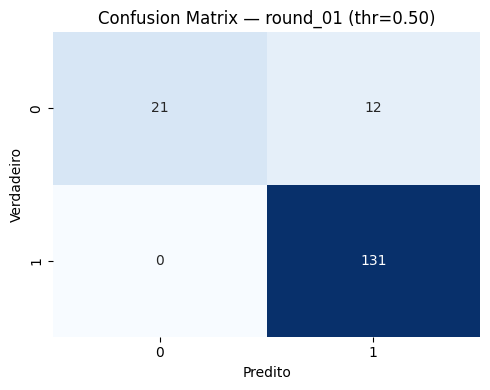

✅ CM salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/r1_confusion_matrix_20251026_211231.png
✅ CM resumo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/r1_confusion_matrix_20251026_211231.txt
⚠️ train_log não encontrado — pulando curvas.
🧠 SHAP global (todas as features) salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/r1_shap_global_log_20251026_211231.txt


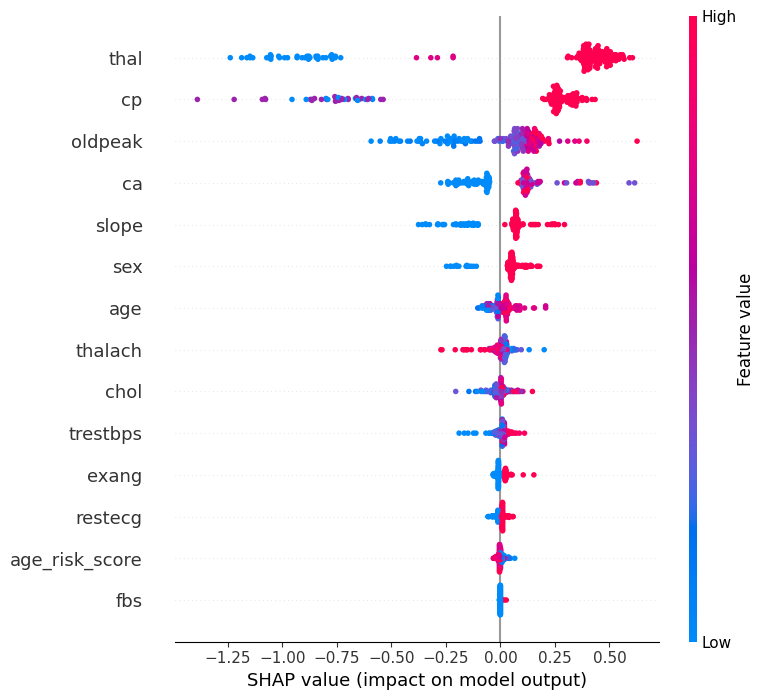

🖼️ SHAP summary global salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/r1_shap_global_summary_20251026_211231.png
💾 SHAP fp (todas as features) salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/r1_shap_fp_top_features_20251026_211231.txt


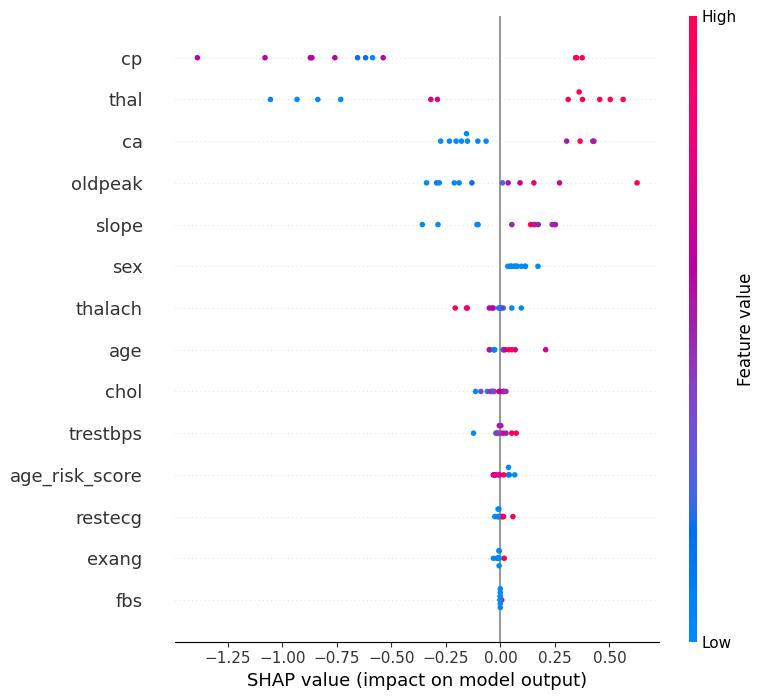

🖼️ SHAP summary fp salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/r1_shap_fp_summary_20251026_211231.png
⚠️ Sem casos para FN — pulando SHAP local.

✅ Análise consolidada salva: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_01/r1_analysis_summary_20251026_211231.txt
🎯 Pipeline de análise concluído.


In [16]:
# =========================================================
# 🚀 MODEL ANALYSIS PIPELINE — Governança por Round
# =========================================================
# Saídas (todas prefixadas):
#   {prefixo}_confusion_matrix_{ts}.png/.txt
#   {prefixo}_train_curves_{ts}.png
#   {prefixo}_shap_global_summary_{ts}.png
#   {prefixo}_shap_global_log_{ts}.txt
#   {prefixo}_shap_fp_summary_{ts}.png  (se houver FP)
#   {prefixo}_shap_fn_summary_{ts}.png  (se houver FN)
#   {prefixo}_shap_fp_top_features_{ts}.txt (|SHAP| de todas)
#   {prefixo}_shap_fn_top_features_{ts}.txt (|SHAP| de todas)
#   {prefixo}_analysis_summary_{ts}.txt
# =========================================================

import os, re, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
from datetime import datetime
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, log_loss
)

# ===========================
# 0) PARÂMETROS DO ROUND
# ===========================
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
round_id   = "round_01"       # ex.: "round_01", "round_02", "round_03"
prefixo    = "r1"             # ex.: "r1", "r2", "r3"

# ===========================
# utils de caminho/arquivos
# ===========================
def _timestamp():
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def round_dir(drive_path, round_id):
    p = os.path.join(drive_path, "models", "xgboost", "rounds", round_id)
    os.makedirs(p, exist_ok=True)
    return p

def results_txt_path(drive_path):
    p = os.path.join(drive_path, "results")
    os.makedirs(p, exist_ok=True)
    return os.path.join(p, "results.txt")

def find_latest_file(folder, startswith, endswith):
    files = [f for f in os.listdir(folder) if f.startswith(startswith) and f.endswith(endswith)]
    if not files:
        return None
    files.sort()
    return os.path.join(folder, files[-1])

def find_model_path(rdir, prefixo):
    # tenta pelo prefixo; se não houver (rodadas antigas), pega qualquer best_model
    p = find_latest_file(rdir, f"{prefixo}_xgb_best_model_", ".json")
    if p: return p
    return find_latest_file(rdir, "xgb_best_model_", ".json")

def find_train_log_path(rdir, prefixo):
    p = find_latest_file(rdir, f"{prefixo}_train_log_", ".txt")
    if p: return p
    return find_latest_file(rdir, "train_log_", ".txt")

def guess_test_csv(drive_path, round_id):
    # tenta round_X_test.csv primeiro; senão cai no test.csv
    splits = os.path.join(drive_path, "data", "splits")
    cand1 = os.path.join(splits, f"{round_id}_test.csv")
    cand2 = os.path.join(splits, "test.csv")
    return cand1 if os.path.exists(cand1) else cand2

def infer_threshold_from_results(drive_path, round_id, default=0.50):
    path = results_txt_path(drive_path)
    if not os.path.exists(path):
        return default
    try:
        df = pd.read_csv(path, sep="\t")
        if "round" in df.columns and "threshold" in df.columns:
            vals = df[df["round"] == round_id]["threshold"].dropna()
            if len(vals) > 0:
                # pode vir como número ou string
                try:
                    return float(vals.iloc[-1])
                except:
                    pass
    except Exception:
        pass
    return default

# ===========================
# 1) Carregar modelo + dados
# ===========================
ts = _timestamp()
rdir = round_dir(drive_path, round_id)
model_path = find_model_path(rdir, prefixo)
assert model_path is not None, f"❌ Modelo não encontrado em {rdir}"

test_csv = guess_test_csv(drive_path, round_id)
assert os.path.exists(test_csv), f"❌ test.csv não encontrado ({test_csv})"

print(f"📦 Modelo: {model_path}")
print(f"📄 Test  : {test_csv}")

# carrega modelo (compatível XGB 2.x)
model = xgb.XGBClassifier()
model.load_model(model_path)
booster = model.get_booster()

# carrega teste
df_test = pd.read_csv(test_csv)
if "label" not in df_test.columns:
    assert "num" in df_test.columns, "❌ test.csv sem 'label' nem 'num'."
    df_test["label"] = (df_test["num"] > 0).astype(int)

X_cols = [c for c in df_test.columns if c not in ("label", "num")]
X_test = df_test[X_cols].copy()
y_true = df_test["label"].values

# threshold
threshold = infer_threshold_from_results(drive_path, round_id, default=0.50)
print(f"⚖️ Threshold usado: {threshold:.2f}")

# ===========================
# 2) Predições + CM
# ===========================
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
f1   = f1_score(y_true, y_pred, zero_division=0)
auc  = roc_auc_score(y_true, y_prob)
ll   = log_loss(y_true, y_prob)

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# salvar CM (png + txt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — {round_id} (thr={threshold:.2f})")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.tight_layout()
cm_png = os.path.join(rdir, f"{prefixo}_confusion_matrix_{ts}.png")
plt.savefig(cm_png, dpi=300, bbox_inches="tight")
plt.show()

cm_txt = os.path.join(rdir, f"{prefixo}_confusion_matrix_{ts}.txt")
with open(cm_txt, "w") as f:
    f.write("=== CONFUSION MATRIX ===\n")
    f.write(str(cm) + "\n\n")
    f.write("=== DERIVED METRICS ===\n")
    f.write(f"accuracy:  {acc:.4f}\n")
    f.write(f"precision: {prec:.4f}\n")
    f.write(f"recall:    {rec:.4f}\n")
    f.write(f"f1_score:  {f1:.4f}\n")
    f.write(f"auc_roc:   {auc:.4f}\n")
    f.write(f"log_loss:  {ll:.4f}\n")
print(f"✅ CM salvo: {cm_png}\n✅ CM resumo: {cm_txt}")

# ===========================
# 3) Curvas de treino (corrigido)
# ===========================
train_log = find_train_log_path(rdir, prefixo)
if train_log and os.path.exists(train_log):
    try:
        # tenta ler com delimitadores diferentes (tab ou espaço)
        try:
            df_log = pd.read_csv(train_log, sep="\t")
        except Exception:
            df_log = pd.read_csv(train_log, delim_whitespace=True)

        if {"epoch", "train_logloss", "val_logloss"}.issubset(df_log.columns):
            plt.figure(figsize=(7, 5))
            plt.plot(df_log["epoch"], df_log["train_logloss"], label="Treino (logloss)")
            plt.plot(df_log["epoch"], df_log["val_logloss"], label="Validação (logloss)")
            plt.xlabel("Época")
            plt.ylabel("Log Loss")
            plt.title(f"Curvas de Treinamento — {round_id}")
            plt.legend()
            plt.grid(alpha=0.3)
            plt.tight_layout()

            curves_png = os.path.join(rdir, f"{prefixo}_train_curves_{ts}.png")
            plt.savefig(curves_png, dpi=300, bbox_inches="tight")
            plt.show()
            print(f"📈 Curvas de treino salvas em: {curves_png}")
        else:
            print("⚠️ Log de treino encontrado, mas sem colunas esperadas (epoch/logloss).")

        # análise automática de overfitting
        if {"train_error", "val_error"}.issubset(df_log.columns):
            delta = df_log["train_error"].iloc[-1] - df_log["val_error"].iloc[-1]
            status = "balanceado"
            if delta < -0.05:
                status = "underfit (val melhor)"
            elif delta > 0.05:
                status = "overfit (train melhor)"
            print(f"🔎 Overfitting check → Δ(train_error - val_error)={delta:.4f} → {status}")

    except Exception as e:
        print(f"❌ Erro ao processar curvas de treino: {e}")

else:
    print("⚠️ train_log não encontrado — pulando curvas.")


# ===========================
# 4) SHAP (global + FP/FN)
# ===========================
explainer = shap.TreeExplainer(booster)

# --- Global
shap_values = explainer.shap_values(X_test)
mean_abs = (
    pd.DataFrame({"feature": X_cols, "mean_abs_shap": np.abs(shap_values).mean(axis=0)})
    .sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)
)

# salvar LOG global (todas as features)
shap_global_txt = os.path.join(rdir, f"{prefixo}_shap_global_log_{ts}.txt")
mean_abs.to_csv(shap_global_txt, sep="\t", index=False)
print(f"🧠 SHAP global (todas as features) salvo: {shap_global_txt}")

# salvar summary global (png)
plt.figure(figsize=(9,5.5))
shap.summary_plot(shap_values, X_test, show=False)
shap_global_png = os.path.join(rdir, f"{prefixo}_shap_global_summary_{ts}.png")
plt.tight_layout(); plt.savefig(shap_global_png, dpi=300, bbox_inches="tight"); plt.show()
print(f"🖼️ SHAP summary global salvo: {shap_global_png}")

# --- FP/FN subsets
df_pred = df_test.copy()
df_pred["y_prob"] = y_prob
df_pred["y_pred"] = y_pred

FP = df_pred[(df_pred["label"] == 0) & (df_pred["y_pred"] == 1)].copy()
FN = df_pred[(df_pred["label"] == 1) & (df_pred["y_pred"] == 0)].copy()

def shap_subset(name, subset_df):
    if subset_df.empty:
        print(f"⚠️ Sem casos para {name.upper()} — pulando SHAP local.")
        return None, None
    X_sub = subset_df[X_cols]
    sv = explainer.shap_values(X_sub)
    mean_abs_local = (
        pd.DataFrame({"feature": X_cols, "mean_abs_shap": np.abs(sv).mean(axis=0)})
         .sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)
    )
    # log (todas as features)
    txt = os.path.join(rdir, f"{prefixo}_shap_{name}_top_features_{ts}.txt")
    mean_abs_local.to_csv(txt, sep="\t", index=False)
    print(f"💾 SHAP {name} (todas as features) salvo: {txt}")

    # summary png
    plt.figure(figsize=(9,5.5))
    shap.summary_plot(sv, X_sub, show=False)
    png = os.path.join(rdir, f"{prefixo}_shap_{name}_summary_{ts}.png")
    plt.tight_layout(); plt.savefig(png, dpi=300, bbox_inches="tight"); plt.show()
    print(f"🖼️ SHAP summary {name} salvo: {png}")
    return txt, png

fp_txt, fp_png = shap_subset("fp", FP)
fn_txt, fn_png = shap_subset("fn", FN)

# ===========================
# 5) RESUMO CONSOLIDADO
# ===========================
summary_txt = os.path.join(rdir, f"{prefixo}_analysis_summary_{ts}.txt")
with open(summary_txt, "w") as f:
    f.write("=== MODEL ANALYSIS SUMMARY ===\n")
    f.write(f"Round: {round_id}\n")
    f.write(f"Prefixo: {prefixo}\n")
    f.write(f"Timestamp: {ts}\n\n")

    f.write(">> Metrics (recomputadas com threshold atual)\n")
    f.write(f"accuracy:  {acc:.4f}\nprecision: {prec:.4f}\nrecall:    {rec:.4f}\nf1_score:  {f1:.4f}\nauc_roc:   {auc:.4f}\nlog_loss:  {ll:.4f}\n")
    f.write(f"threshold: {threshold:.2f}\n")
    f.write(f"confusion_matrix: {cm.tolist()}\n\n")

    f.write(">> Artefatos gerados\n")
    f.write(f"- CM png:   {os.path.basename(cm_png)}\n")
    f.write(f"- CM txt:   {os.path.basename(cm_txt)}\n")
    if 'curves_png' in locals():
        f.write(f"- Curvas:   {os.path.basename(curves_png)}\n")
    f.write(f"- SHAP global png: {os.path.basename(shap_global_png)}\n")
    f.write(f"- SHAP global log: {os.path.basename(shap_global_txt)}\n")
    if fp_txt: f.write(f"- SHAP FP log:     {os.path.basename(fp_txt)}\n")
    if fp_png: f.write(f"- SHAP FP png:     {os.path.basename(fp_png)}\n")
    if fn_txt: f.write(f"- SHAP FN log:     {os.path.basename(fn_txt)}\n")
    if fn_png: f.write(f"- SHAP FN png:     {os.path.basename(fn_png)}\n")

print(f"\n✅ Análise consolidada salva: {summary_txt}")
print("🎯 Pipeline de análise concluído.")


# ---------------------------------------------------------
# Chamada prática — logo após salvar o summary:
# ---------------------------------------------------------
metrics_audit = {
    "accuracy": acc,
    "precision": prec,
    "recall": rec,
    "f1_score": f1,
    "auc_roc": auc,
    "log_loss": ll,
    "timestamp": ts
}

update_results_after_analysis(
    results_dir=results_txt_path(drive_path).replace("/results.txt", ""),
    prefix=prefixo,
    round_id=round_id,
    model_name="xgboost",
    metrics=metrics_audit,
    xgb_params=model.get_params(),
    train_samples=len(X_test) + len(y_true),  # ou len(X_train) se quiser real
    test_samples=len(X_test),
    best_iteration=None,
    adjustments=f"Avaliação pós-análise SHAP ({round_id})"
)


### Round_02

📦 Modelo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_xgb_best_model_20251026_211107.json
📄 Test  : /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/data/splits/round_02_test.csv
⚖️ Threshold usado: 0.50


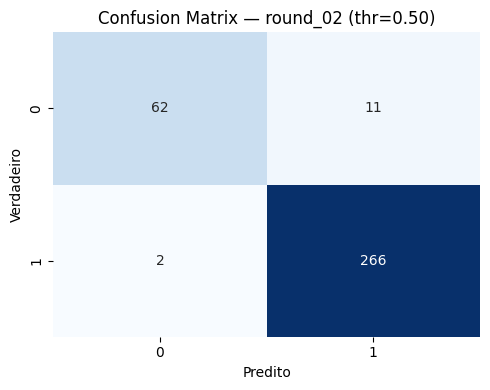

✅ CM salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_confusion_matrix_20251026_211336.png
✅ CM resumo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_confusion_matrix_20251026_211336.txt


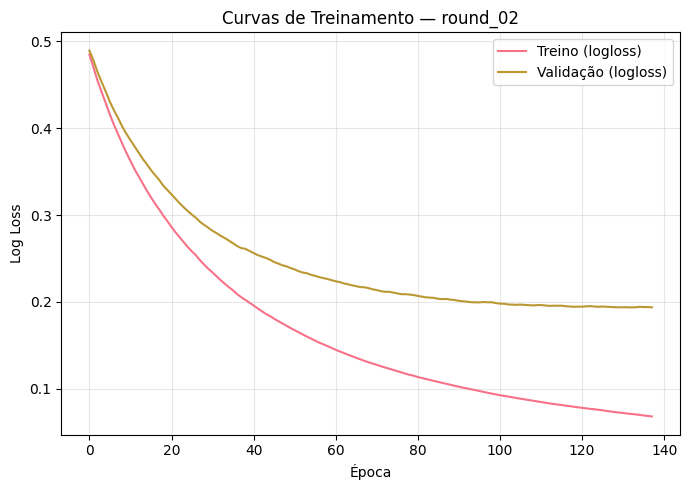

📈 Curvas de treino salvas em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_train_curves_20251026_211336.png
🔎 Overfitting check → Δ(train_error - val_error)=-0.0458 → balanceado
🧠 SHAP global (todas as features) salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_shap_global_log_20251026_211336.txt


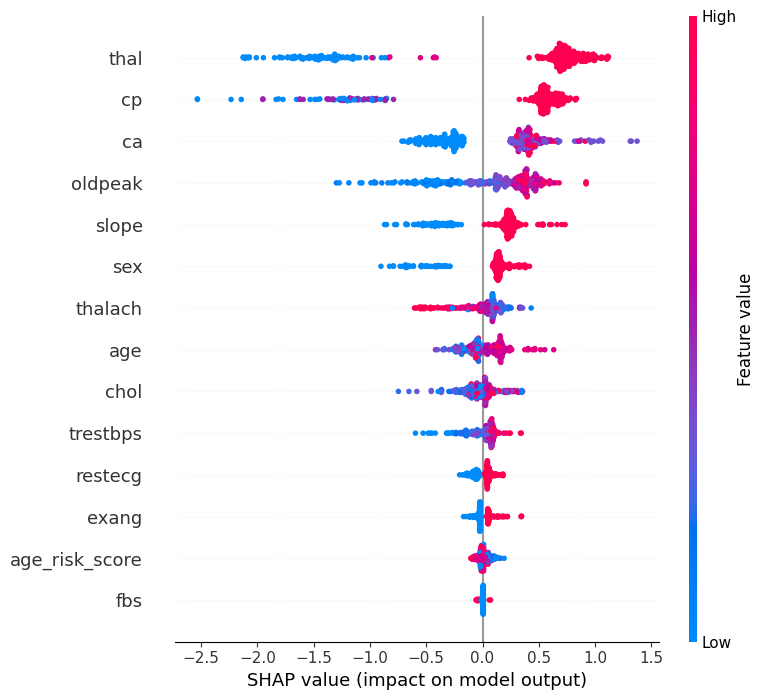

🖼️ SHAP summary global salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_shap_global_summary_20251026_211336.png
💾 SHAP fp (todas as features) salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_shap_fp_top_features_20251026_211336.txt


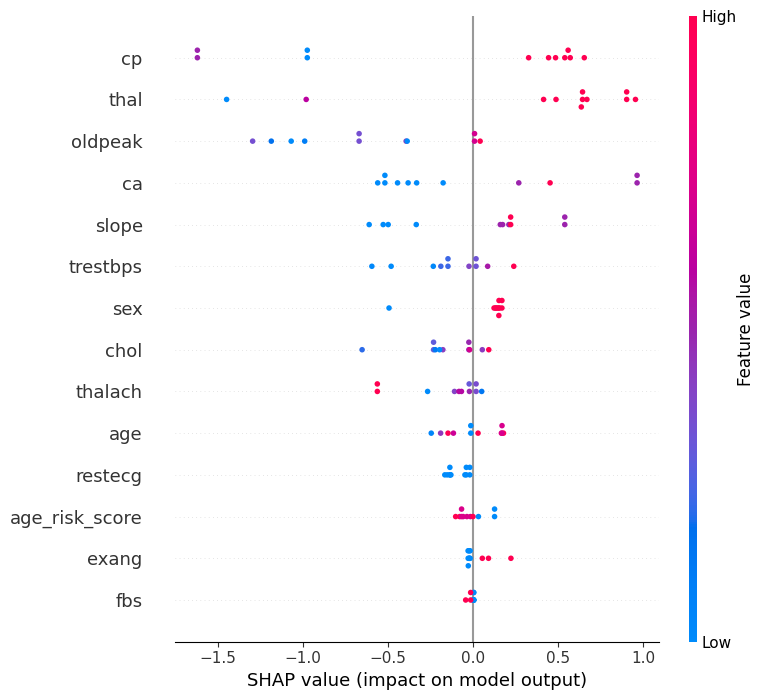

🖼️ SHAP summary fp salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_shap_fp_summary_20251026_211336.png
💾 SHAP fn (todas as features) salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_shap_fn_top_features_20251026_211336.txt


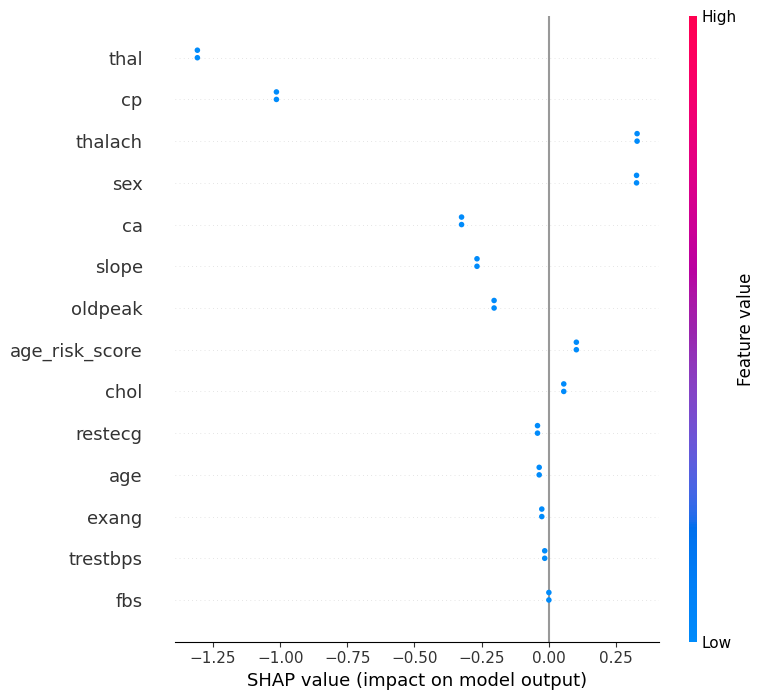

🖼️ SHAP summary fn salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_shap_fn_summary_20251026_211336.png

✅ Análise consolidada salva: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_02/r2_analysis_summary_20251026_211336.txt
🎯 Pipeline de análise concluído.


In [17]:
# 🚀 MODEL ANALYSIS PIPELINE — Governança por Round
# =========================================================
# Saídas (todas prefixadas):
#   {prefixo}_confusion_matrix_{ts}.png/.txt
#   {prefixo}_train_curves_{ts}.png
#   {prefixo}_shap_global_summary_{ts}.png
#   {prefixo}_shap_global_log_{ts}.txt
#   {prefixo}_shap_fp_summary_{ts}.png  (se houver FP)
#   {prefixo}_shap_fn_summary_{ts}.png  (se houver FN)
#   {prefixo}_shap_fp_top_features_{ts}.txt (|SHAP| de todas)
#   {prefixo}_shap_fn_top_features_{ts}.txt (|SHAP| de todas)
#   {prefixo}_analysis_summary_{ts}.txt
# =========================================================

import os, re, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
from datetime import datetime
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, log_loss
)

# ===========================
# 0) PARÂMETROS DO ROUND
# ===========================
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
round_id   = "round_02"       # ex.: "round_01", "round_02", "round_03"
prefixo    = "r2"             # ex.: "r1", "r2", "r3"

# ===========================
# utils de caminho/arquivos
# ===========================
def _timestamp():
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def round_dir(drive_path, round_id):
    p = os.path.join(drive_path, "models", "xgboost", "rounds", round_id)
    os.makedirs(p, exist_ok=True)
    return p

def results_txt_path(drive_path):
    p = os.path.join(drive_path, "results")
    os.makedirs(p, exist_ok=True)
    return os.path.join(p, "results.txt")

def find_latest_file(folder, startswith, endswith):
    files = [f for f in os.listdir(folder) if f.startswith(startswith) and f.endswith(endswith)]
    if not files:
        return None
    files.sort()
    return os.path.join(folder, files[-1])

def find_model_path(rdir, prefixo):
    # tenta pelo prefixo; se não houver (rodadas antigas), pega qualquer best_model
    p = find_latest_file(rdir, f"{prefixo}_xgb_best_model_", ".json")
    if p: return p
    return find_latest_file(rdir, "xgb_best_model_", ".json")

def find_train_log_path(rdir, prefixo):
    p = find_latest_file(rdir, f"{prefixo}_train_log_", ".txt")
    if p: return p
    return find_latest_file(rdir, "train_log_", ".txt")

def guess_test_csv(drive_path, round_id):
    # tenta round_X_test.csv primeiro; senão cai no test.csv
    splits = os.path.join(drive_path, "data", "splits")
    cand1 = os.path.join(splits, f"{round_id}_test.csv")
    cand2 = os.path.join(splits, "test.csv")
    return cand1 if os.path.exists(cand1) else cand2

def infer_threshold_from_results(drive_path, round_id, default=0.50):
    path = results_txt_path(drive_path)
    if not os.path.exists(path):
        return default
    try:
        df = pd.read_csv(path, sep="\t")
        if "round" in df.columns and "threshold" in df.columns:
            vals = df[df["round"] == round_id]["threshold"].dropna()
            if len(vals) > 0:
                # pode vir como número ou string
                try:
                    return float(vals.iloc[-1])
                except:
                    pass
    except Exception:
        pass
    return default

# ===========================
# 1) Carregar modelo + dados
# ===========================
ts = _timestamp()
rdir = round_dir(drive_path, round_id)
model_path = find_model_path(rdir, prefixo)
assert model_path is not None, f"❌ Modelo não encontrado em {rdir}"

test_csv = guess_test_csv(drive_path, round_id)
assert os.path.exists(test_csv), f"❌ test.csv não encontrado ({test_csv})"

print(f"📦 Modelo: {model_path}")
print(f"📄 Test  : {test_csv}")

# carrega modelo (compatível XGB 2.x)
model = xgb.XGBClassifier()
model.load_model(model_path)
booster = model.get_booster()

# carrega teste
df_test = pd.read_csv(test_csv)
if "label" not in df_test.columns:
    assert "num" in df_test.columns, "❌ test.csv sem 'label' nem 'num'."
    df_test["label"] = (df_test["num"] > 0).astype(int)

X_cols = [c for c in df_test.columns if c not in ("label", "num")]
X_test = df_test[X_cols].copy()
y_true = df_test["label"].values

# threshold
threshold = infer_threshold_from_results(drive_path, round_id, default=0.50)
print(f"⚖️ Threshold usado: {threshold:.2f}")

# ===========================
# 2) Predições + CM
# ===========================
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
f1   = f1_score(y_true, y_pred, zero_division=0)
auc  = roc_auc_score(y_true, y_prob)
ll   = log_loss(y_true, y_prob)

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# salvar CM (png + txt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — {round_id} (thr={threshold:.2f})")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.tight_layout()
cm_png = os.path.join(rdir, f"{prefixo}_confusion_matrix_{ts}.png")
plt.savefig(cm_png, dpi=300, bbox_inches="tight")
plt.show()

cm_txt = os.path.join(rdir, f"{prefixo}_confusion_matrix_{ts}.txt")
with open(cm_txt, "w") as f:
    f.write("=== CONFUSION MATRIX ===\n")
    f.write(str(cm) + "\n\n")
    f.write("=== DERIVED METRICS ===\n")
    f.write(f"accuracy:  {acc:.4f}\n")
    f.write(f"precision: {prec:.4f}\n")
    f.write(f"recall:    {rec:.4f}\n")
    f.write(f"f1_score:  {f1:.4f}\n")
    f.write(f"auc_roc:   {auc:.4f}\n")
    f.write(f"log_loss:  {ll:.4f}\n")
print(f"✅ CM salvo: {cm_png}\n✅ CM resumo: {cm_txt}")

# ===========================
# 3) Curvas de treino (corrigido)
# ===========================
train_log = find_train_log_path(rdir, prefixo)
if train_log and os.path.exists(train_log):
    try:
        # tenta ler com delimitadores diferentes (tab ou espaço)
        try:
            df_log = pd.read_csv(train_log, sep="\t")
        except Exception:
            df_log = pd.read_csv(train_log, delim_whitespace=True)

        if {"epoch", "train_logloss", "val_logloss"}.issubset(df_log.columns):
            plt.figure(figsize=(7, 5))
            plt.plot(df_log["epoch"], df_log["train_logloss"], label="Treino (logloss)")
            plt.plot(df_log["epoch"], df_log["val_logloss"], label="Validação (logloss)")
            plt.xlabel("Época")
            plt.ylabel("Log Loss")
            plt.title(f"Curvas de Treinamento — {round_id}")
            plt.legend()
            plt.grid(alpha=0.3)
            plt.tight_layout()

            curves_png = os.path.join(rdir, f"{prefixo}_train_curves_{ts}.png")
            plt.savefig(curves_png, dpi=300, bbox_inches="tight")
            plt.show()
            print(f"📈 Curvas de treino salvas em: {curves_png}")
        else:
            print("⚠️ Log de treino encontrado, mas sem colunas esperadas (epoch/logloss).")

        # análise automática de overfitting
        if {"train_error", "val_error"}.issubset(df_log.columns):
            delta = df_log["train_error"].iloc[-1] - df_log["val_error"].iloc[-1]
            status = "balanceado"
            if delta < -0.05:
                status = "underfit (val melhor)"
            elif delta > 0.05:
                status = "overfit (train melhor)"
            print(f"🔎 Overfitting check → Δ(train_error - val_error)={delta:.4f} → {status}")

    except Exception as e:
        print(f"❌ Erro ao processar curvas de treino: {e}")

else:
    print("⚠️ train_log não encontrado — pulando curvas.")


# ===========================
# 4) SHAP (global + FP/FN)
# ===========================
explainer = shap.TreeExplainer(booster)

# --- Global
shap_values = explainer.shap_values(X_test)
mean_abs = (
    pd.DataFrame({"feature": X_cols, "mean_abs_shap": np.abs(shap_values).mean(axis=0)})
    .sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)
)

# salvar LOG global (todas as features)
shap_global_txt = os.path.join(rdir, f"{prefixo}_shap_global_log_{ts}.txt")
mean_abs.to_csv(shap_global_txt, sep="\t", index=False)
print(f"🧠 SHAP global (todas as features) salvo: {shap_global_txt}")

# salvar summary global (png)
plt.figure(figsize=(9,5.5))
shap.summary_plot(shap_values, X_test, show=False)
shap_global_png = os.path.join(rdir, f"{prefixo}_shap_global_summary_{ts}.png")
plt.tight_layout(); plt.savefig(shap_global_png, dpi=300, bbox_inches="tight"); plt.show()
print(f"🖼️ SHAP summary global salvo: {shap_global_png}")

# --- FP/FN subsets
df_pred = df_test.copy()
df_pred["y_prob"] = y_prob
df_pred["y_pred"] = y_pred

FP = df_pred[(df_pred["label"] == 0) & (df_pred["y_pred"] == 1)].copy()
FN = df_pred[(df_pred["label"] == 1) & (df_pred["y_pred"] == 0)].copy()

def shap_subset(name, subset_df):
    if subset_df.empty:
        print(f"⚠️ Sem casos para {name.upper()} — pulando SHAP local.")
        return None, None
    X_sub = subset_df[X_cols]
    sv = explainer.shap_values(X_sub)
    mean_abs_local = (
        pd.DataFrame({"feature": X_cols, "mean_abs_shap": np.abs(sv).mean(axis=0)})
         .sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)
    )
    # log (todas as features)
    txt = os.path.join(rdir, f"{prefixo}_shap_{name}_top_features_{ts}.txt")
    mean_abs_local.to_csv(txt, sep="\t", index=False)
    print(f"💾 SHAP {name} (todas as features) salvo: {txt}")

    # summary png
    plt.figure(figsize=(9,5.5))
    shap.summary_plot(sv, X_sub, show=False)
    png = os.path.join(rdir, f"{prefixo}_shap_{name}_summary_{ts}.png")
    plt.tight_layout(); plt.savefig(png, dpi=300, bbox_inches="tight"); plt.show()
    print(f"🖼️ SHAP summary {name} salvo: {png}")
    return txt, png

fp_txt, fp_png = shap_subset("fp", FP)
fn_txt, fn_png = shap_subset("fn", FN)

# ===========================
# 5) RESUMO CONSOLIDADO
# ===========================
summary_txt = os.path.join(rdir, f"{prefixo}_analysis_summary_{ts}.txt")
with open(summary_txt, "w") as f:
    f.write("=== MODEL ANALYSIS SUMMARY ===\n")
    f.write(f"Round: {round_id}\n")
    f.write(f"Prefixo: {prefixo}\n")
    f.write(f"Timestamp: {ts}\n\n")

    f.write(">> Metrics (recomputadas com threshold atual)\n")
    f.write(f"accuracy:  {acc:.4f}\nprecision: {prec:.4f}\nrecall:    {rec:.4f}\nf1_score:  {f1:.4f}\nauc_roc:   {auc:.4f}\nlog_loss:  {ll:.4f}\n")
    f.write(f"threshold: {threshold:.2f}\n")
    f.write(f"confusion_matrix: {cm.tolist()}\n\n")

    f.write(">> Artefatos gerados\n")
    f.write(f"- CM png:   {os.path.basename(cm_png)}\n")
    f.write(f"- CM txt:   {os.path.basename(cm_txt)}\n")
    if 'curves_png' in locals():
        f.write(f"- Curvas:   {os.path.basename(curves_png)}\n")
    f.write(f"- SHAP global png: {os.path.basename(shap_global_png)}\n")
    f.write(f"- SHAP global log: {os.path.basename(shap_global_txt)}\n")
    if fp_txt: f.write(f"- SHAP FP log:     {os.path.basename(fp_txt)}\n")
    if fp_png: f.write(f"- SHAP FP png:     {os.path.basename(fp_png)}\n")
    if fn_txt: f.write(f"- SHAP FN log:     {os.path.basename(fn_txt)}\n")
    if fn_png: f.write(f"- SHAP FN png:     {os.path.basename(fn_png)}\n")

print(f"\n✅ Análise consolidada salva: {summary_txt}")
print("🎯 Pipeline de análise concluído.")


# ---------------------------------------------------------
# Chamada prática — logo após salvar o summary:
# ---------------------------------------------------------
metrics_audit = {
    "accuracy": acc,
    "precision": prec,
    "recall": rec,
    "f1_score": f1,
    "auc_roc": auc,
    "log_loss": ll,
    "timestamp": ts
}

update_results_after_analysis(
    results_dir=results_txt_path(drive_path).replace("/results.txt", ""),
    prefix=prefixo,
    round_id=round_id,
    model_name="xgboost",
    metrics=metrics_audit,
    xgb_params=model.get_params(),
    train_samples=len(X_test) + len(y_true),  # ou len(X_train) se quiser real
    test_samples=len(X_test),
    best_iteration=None,
    adjustments=f"Avaliação pós-análise SHAP ({round_id})"
)



### Round_03

📦 Modelo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_03/r3_xgb_best_model_20251026_211119.json
📄 Test  : /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/data/splits/test.csv
⚖️ Threshold usado: 0.50


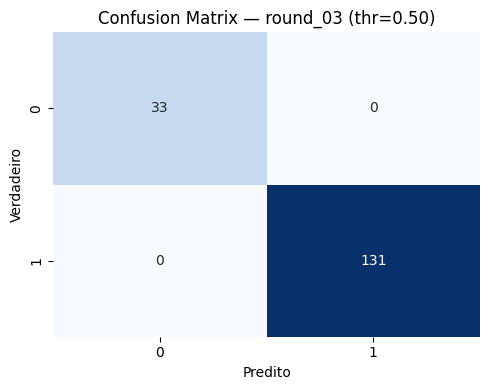

✅ CM salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_03/r3_confusion_matrix_20251026_211420.png
✅ CM resumo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_03/r3_confusion_matrix_20251026_211420.txt


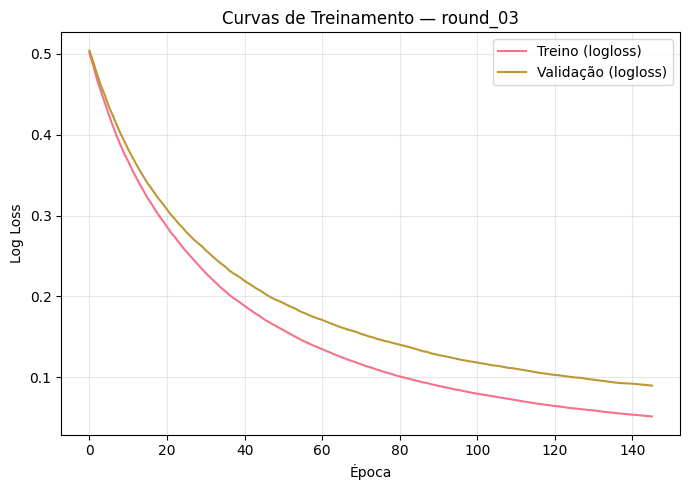

📈 Curvas de treino salvas em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_03/r3_train_curves_20251026_211420.png
🔎 Overfitting check → Δ(train_error - val_error)=-0.0249 → balanceado
🧠 SHAP global (todas as features) salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_03/r3_shap_global_log_20251026_211420.txt


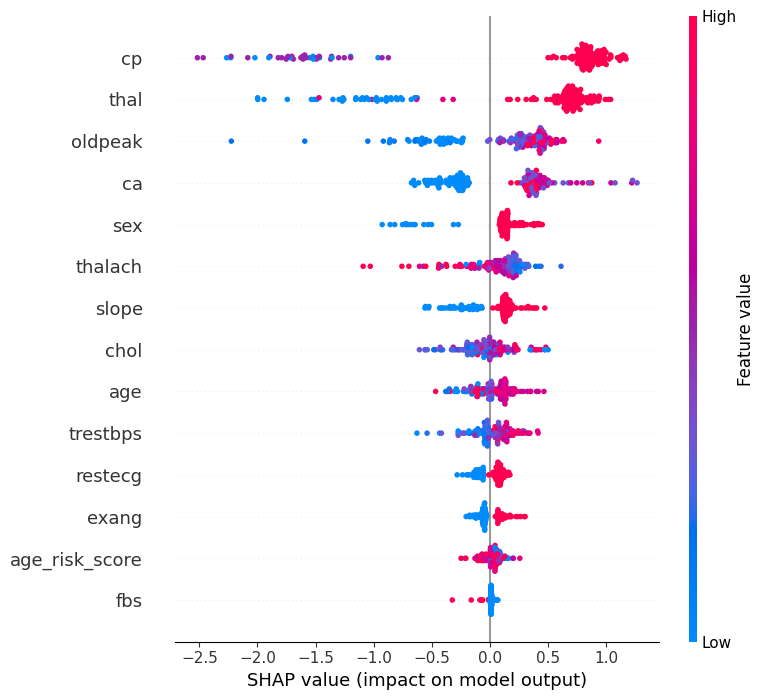

🖼️ SHAP summary global salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_03/r3_shap_global_summary_20251026_211420.png
⚠️ Sem casos para FP — pulando SHAP local.
⚠️ Sem casos para FN — pulando SHAP local.

✅ Análise consolidada salva: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/models/xgboost/rounds/round_03/r3_analysis_summary_20251026_211420.txt
🎯 Pipeline de análise concluído.


In [18]:
# 🚀 MODEL ANALYSIS PIPELINE — Governança por Round
# =========================================================
# Saídas (todas prefixadas):
#   {prefixo}_confusion_matrix_{ts}.png/.txt
#   {prefixo}_train_curves_{ts}.png
#   {prefixo}_shap_global_summary_{ts}.png
#   {prefixo}_shap_global_log_{ts}.txt
#   {prefixo}_shap_fp_summary_{ts}.png  (se houver FP)
#   {prefixo}_shap_fn_summary_{ts}.png  (se houver FN)
#   {prefixo}_shap_fp_top_features_{ts}.txt (|SHAP| de todas)
#   {prefixo}_shap_fn_top_features_{ts}.txt (|SHAP| de todas)
#   {prefixo}_analysis_summary_{ts}.txt
# =========================================================

import os, re, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
from datetime import datetime
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, log_loss
)

# ===========================
# 0) PARÂMETROS DO ROUND
# ===========================
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
round_id   = "round_03"       # ex.: "round_01", "round_02", "round_03"
prefixo    = "r3"             # ex.: "r1", "r2", "r3"

# ===========================
# utils de caminho/arquivos
# ===========================
def _timestamp():
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def round_dir(drive_path, round_id):
    p = os.path.join(drive_path, "models", "xgboost", "rounds", round_id)
    os.makedirs(p, exist_ok=True)
    return p

def results_txt_path(drive_path):
    p = os.path.join(drive_path, "results")
    os.makedirs(p, exist_ok=True)
    return os.path.join(p, "results.txt")

def find_latest_file(folder, startswith, endswith):
    files = [f for f in os.listdir(folder) if f.startswith(startswith) and f.endswith(endswith)]
    if not files:
        return None
    files.sort()
    return os.path.join(folder, files[-1])

def find_model_path(rdir, prefixo):
    # tenta pelo prefixo; se não houver (rodadas antigas), pega qualquer best_model
    p = find_latest_file(rdir, f"{prefixo}_xgb_best_model_", ".json")
    if p: return p
    return find_latest_file(rdir, "xgb_best_model_", ".json")

def find_train_log_path(rdir, prefixo):
    p = find_latest_file(rdir, f"{prefixo}_train_log_", ".txt")
    if p: return p
    return find_latest_file(rdir, "train_log_", ".txt")

def guess_test_csv(drive_path, round_id):
    # tenta round_X_test.csv primeiro; senão cai no test.csv
    splits = os.path.join(drive_path, "data", "splits")
    cand1 = os.path.join(splits, f"{round_id}_test.csv")
    cand2 = os.path.join(splits, "test.csv")
    return cand1 if os.path.exists(cand1) else cand2

def infer_threshold_from_results(drive_path, round_id, default=0.50):
    path = results_txt_path(drive_path)
    if not os.path.exists(path):
        return default
    try:
        df = pd.read_csv(path, sep="\t")
        if "round" in df.columns and "threshold" in df.columns:
            vals = df[df["round"] == round_id]["threshold"].dropna()
            if len(vals) > 0:
                # pode vir como número ou string
                try:
                    return float(vals.iloc[-1])
                except:
                    pass
    except Exception:
        pass
    return default

# ===========================
# 1) Carregar modelo + dados
# ===========================
ts = _timestamp()
rdir = round_dir(drive_path, round_id)
model_path = find_model_path(rdir, prefixo)
assert model_path is not None, f"❌ Modelo não encontrado em {rdir}"

test_csv = guess_test_csv(drive_path, round_id)
assert os.path.exists(test_csv), f"❌ test.csv não encontrado ({test_csv})"

print(f"📦 Modelo: {model_path}")
print(f"📄 Test  : {test_csv}")

# carrega modelo (compatível XGB 2.x)
model = xgb.XGBClassifier()
model.load_model(model_path)
booster = model.get_booster()

# carrega teste
df_test = pd.read_csv(test_csv)
if "label" not in df_test.columns:
    assert "num" in df_test.columns, "❌ test.csv sem 'label' nem 'num'."
    df_test["label"] = (df_test["num"] > 0).astype(int)

X_cols = [c for c in df_test.columns if c not in ("label", "num")]
X_test = df_test[X_cols].copy()
y_true = df_test["label"].values

# threshold
threshold = infer_threshold_from_results(drive_path, round_id, default=0.50)
print(f"⚖️ Threshold usado: {threshold:.2f}")

# ===========================
# 2) Predições + CM
# ===========================
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
f1   = f1_score(y_true, y_pred, zero_division=0)
auc  = roc_auc_score(y_true, y_prob)
ll   = log_loss(y_true, y_prob)

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# salvar CM (png + txt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix — {round_id} (thr={threshold:.2f})")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.tight_layout()
cm_png = os.path.join(rdir, f"{prefixo}_confusion_matrix_{ts}.png")
plt.savefig(cm_png, dpi=300, bbox_inches="tight")
plt.show()

cm_txt = os.path.join(rdir, f"{prefixo}_confusion_matrix_{ts}.txt")
with open(cm_txt, "w") as f:
    f.write("=== CONFUSION MATRIX ===\n")
    f.write(str(cm) + "\n\n")
    f.write("=== DERIVED METRICS ===\n")
    f.write(f"accuracy:  {acc:.4f}\n")
    f.write(f"precision: {prec:.4f}\n")
    f.write(f"recall:    {rec:.4f}\n")
    f.write(f"f1_score:  {f1:.4f}\n")
    f.write(f"auc_roc:   {auc:.4f}\n")
    f.write(f"log_loss:  {ll:.4f}\n")
print(f"✅ CM salvo: {cm_png}\n✅ CM resumo: {cm_txt}")

# ===========================
# 3) Curvas de treino (corrigido)
# ===========================
train_log = find_train_log_path(rdir, prefixo)
if train_log and os.path.exists(train_log):
    try:
        # tenta ler com delimitadores diferentes (tab ou espaço)
        try:
            df_log = pd.read_csv(train_log, sep="\t")
        except Exception:
            df_log = pd.read_csv(train_log, delim_whitespace=True)

        if {"epoch", "train_logloss", "val_logloss"}.issubset(df_log.columns):
            plt.figure(figsize=(7, 5))
            plt.plot(df_log["epoch"], df_log["train_logloss"], label="Treino (logloss)")
            plt.plot(df_log["epoch"], df_log["val_logloss"], label="Validação (logloss)")
            plt.xlabel("Época")
            plt.ylabel("Log Loss")
            plt.title(f"Curvas de Treinamento — {round_id}")
            plt.legend()
            plt.grid(alpha=0.3)
            plt.tight_layout()

            curves_png = os.path.join(rdir, f"{prefixo}_train_curves_{ts}.png")
            plt.savefig(curves_png, dpi=300, bbox_inches="tight")
            plt.show()
            print(f"📈 Curvas de treino salvas em: {curves_png}")
        else:
            print("⚠️ Log de treino encontrado, mas sem colunas esperadas (epoch/logloss).")

        # análise automática de overfitting
        if {"train_error", "val_error"}.issubset(df_log.columns):
            delta = df_log["train_error"].iloc[-1] - df_log["val_error"].iloc[-1]
            status = "balanceado"
            if delta < -0.05:
                status = "underfit (val melhor)"
            elif delta > 0.05:
                status = "overfit (train melhor)"
            print(f"🔎 Overfitting check → Δ(train_error - val_error)={delta:.4f} → {status}")

    except Exception as e:
        print(f"❌ Erro ao processar curvas de treino: {e}")

else:
    print("⚠️ train_log não encontrado — pulando curvas.")


# ===========================
# 4) SHAP (global + FP/FN)
# ===========================
explainer = shap.TreeExplainer(booster)

# --- Global
shap_values = explainer.shap_values(X_test)
mean_abs = (
    pd.DataFrame({"feature": X_cols, "mean_abs_shap": np.abs(shap_values).mean(axis=0)})
    .sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)
)

# salvar LOG global (todas as features)
shap_global_txt = os.path.join(rdir, f"{prefixo}_shap_global_log_{ts}.txt")
mean_abs.to_csv(shap_global_txt, sep="\t", index=False)
print(f"🧠 SHAP global (todas as features) salvo: {shap_global_txt}")

# salvar summary global (png)
plt.figure(figsize=(9,5.5))
shap.summary_plot(shap_values, X_test, show=False)
shap_global_png = os.path.join(rdir, f"{prefixo}_shap_global_summary_{ts}.png")
plt.tight_layout(); plt.savefig(shap_global_png, dpi=300, bbox_inches="tight"); plt.show()
print(f"🖼️ SHAP summary global salvo: {shap_global_png}")

# --- FP/FN subsets
df_pred = df_test.copy()
df_pred["y_prob"] = y_prob
df_pred["y_pred"] = y_pred

FP = df_pred[(df_pred["label"] == 0) & (df_pred["y_pred"] == 1)].copy()
FN = df_pred[(df_pred["label"] == 1) & (df_pred["y_pred"] == 0)].copy()

def shap_subset(name, subset_df):
    if subset_df.empty:
        print(f"⚠️ Sem casos para {name.upper()} — pulando SHAP local.")
        return None, None
    X_sub = subset_df[X_cols]
    sv = explainer.shap_values(X_sub)
    mean_abs_local = (
        pd.DataFrame({"feature": X_cols, "mean_abs_shap": np.abs(sv).mean(axis=0)})
         .sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)
    )
    # log (todas as features)
    txt = os.path.join(rdir, f"{prefixo}_shap_{name}_top_features_{ts}.txt")
    mean_abs_local.to_csv(txt, sep="\t", index=False)
    print(f"💾 SHAP {name} (todas as features) salvo: {txt}")

    # summary png
    plt.figure(figsize=(9,5.5))
    shap.summary_plot(sv, X_sub, show=False)
    png = os.path.join(rdir, f"{prefixo}_shap_{name}_summary_{ts}.png")
    plt.tight_layout(); plt.savefig(png, dpi=300, bbox_inches="tight"); plt.show()
    print(f"🖼️ SHAP summary {name} salvo: {png}")
    return txt, png

fp_txt, fp_png = shap_subset("fp", FP)
fn_txt, fn_png = shap_subset("fn", FN)

# ===========================
# 5) RESUMO CONSOLIDADO
# ===========================
summary_txt = os.path.join(rdir, f"{prefixo}_analysis_summary_{ts}.txt")
with open(summary_txt, "w") as f:
    f.write("=== MODEL ANALYSIS SUMMARY ===\n")
    f.write(f"Round: {round_id}\n")
    f.write(f"Prefixo: {prefixo}\n")
    f.write(f"Timestamp: {ts}\n\n")

    f.write(">> Metrics (recomputadas com threshold atual)\n")
    f.write(f"accuracy:  {acc:.4f}\nprecision: {prec:.4f}\nrecall:    {rec:.4f}\nf1_score:  {f1:.4f}\nauc_roc:   {auc:.4f}\nlog_loss:  {ll:.4f}\n")
    f.write(f"threshold: {threshold:.2f}\n")
    f.write(f"confusion_matrix: {cm.tolist()}\n\n")

    f.write(">> Artefatos gerados\n")
    f.write(f"- CM png:   {os.path.basename(cm_png)}\n")
    f.write(f"- CM txt:   {os.path.basename(cm_txt)}\n")
    if 'curves_png' in locals():
        f.write(f"- Curvas:   {os.path.basename(curves_png)}\n")
    f.write(f"- SHAP global png: {os.path.basename(shap_global_png)}\n")
    f.write(f"- SHAP global log: {os.path.basename(shap_global_txt)}\n")
    if fp_txt: f.write(f"- SHAP FP log:     {os.path.basename(fp_txt)}\n")
    if fp_png: f.write(f"- SHAP FP png:     {os.path.basename(fp_png)}\n")
    if fn_txt: f.write(f"- SHAP FN log:     {os.path.basename(fn_txt)}\n")
    if fn_png: f.write(f"- SHAP FN png:     {os.path.basename(fn_png)}\n")

print(f"\n✅ Análise consolidada salva: {summary_txt}")
print("🎯 Pipeline de análise concluído.")


# ---------------------------------------------------------
# Chamada prática — logo após salvar o summary:
# ---------------------------------------------------------
metrics_audit = {
    "accuracy": acc,
    "precision": prec,
    "recall": rec,
    "f1_score": f1,
    "auc_roc": auc,
    "log_loss": ll,
    "timestamp": ts
}

update_results_after_analysis(
    results_dir=results_txt_path(drive_path).replace("/results.txt", ""),
    prefix=prefixo,
    round_id=round_id,
    model_name="xgboost",
    metrics=metrics_audit,
    xgb_params=model.get_params(),
    train_samples=len(X_test) + len(y_true),  # ou len(X_train) se quiser real
    test_samples=len(X_test),
    best_iteration=None,
    adjustments=f"Avaliação pós-análise SHAP ({round_id})"
)


## Análise comparativa entre rounds

📊 O que esta análise vai mostrar:

1. Evolução Visual das Métricas
   - Gráficos de linha mostrando a melhoria em accuracy, precision, recall, F1, AUC e log loss

2. Análise Quantitativa
   - Percentuais exatos de melhoria entre rounds
   - Impacto de cada ajuste nos parâmetros

3. Insights Específicos
   - Round 1 → Round 2: Impacto do ajuste do scale_pos_weight e max_depth
   - Round 2 → Round 3: Impacto do aumento dos dados de treino + oversampling direcionado

4. Correlações
   - Como cada parâmetro (scale_pos_weight, max_depth, etc.) correlaciona com a accuracy

🎯 ANÁLISE COMPARATIVA - ROUNDS DE TREINAMENTO XGBOOST
📊 Total de rounds analisados: 3
🕒 Período: 25/10 21:32 a 25/10 21:35


📈 EVOLUÇÃO DAS MÉTRICAS PRINCIPAIS
--------------------------------------------------
✅ ACCURACY    : 0.9268 → 0.9707 (+4.74%)
✅ PRECISION   : 0.9161 → 0.9708 (+5.97%)
✅ RECALL      : 1.0000 → 0.9925 (-0.75%)
✅ F1_SCORE    : 0.9562 → 0.9815 (+2.65%)
✅ AUC_ROC     : 0.9635 → 0.9959 (+3.36%)
✅ LOG_LOSS    : 0.2599 → 0.1065 (+59.02% de redução)




/tmp/ipython-input-532683291.py:73: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


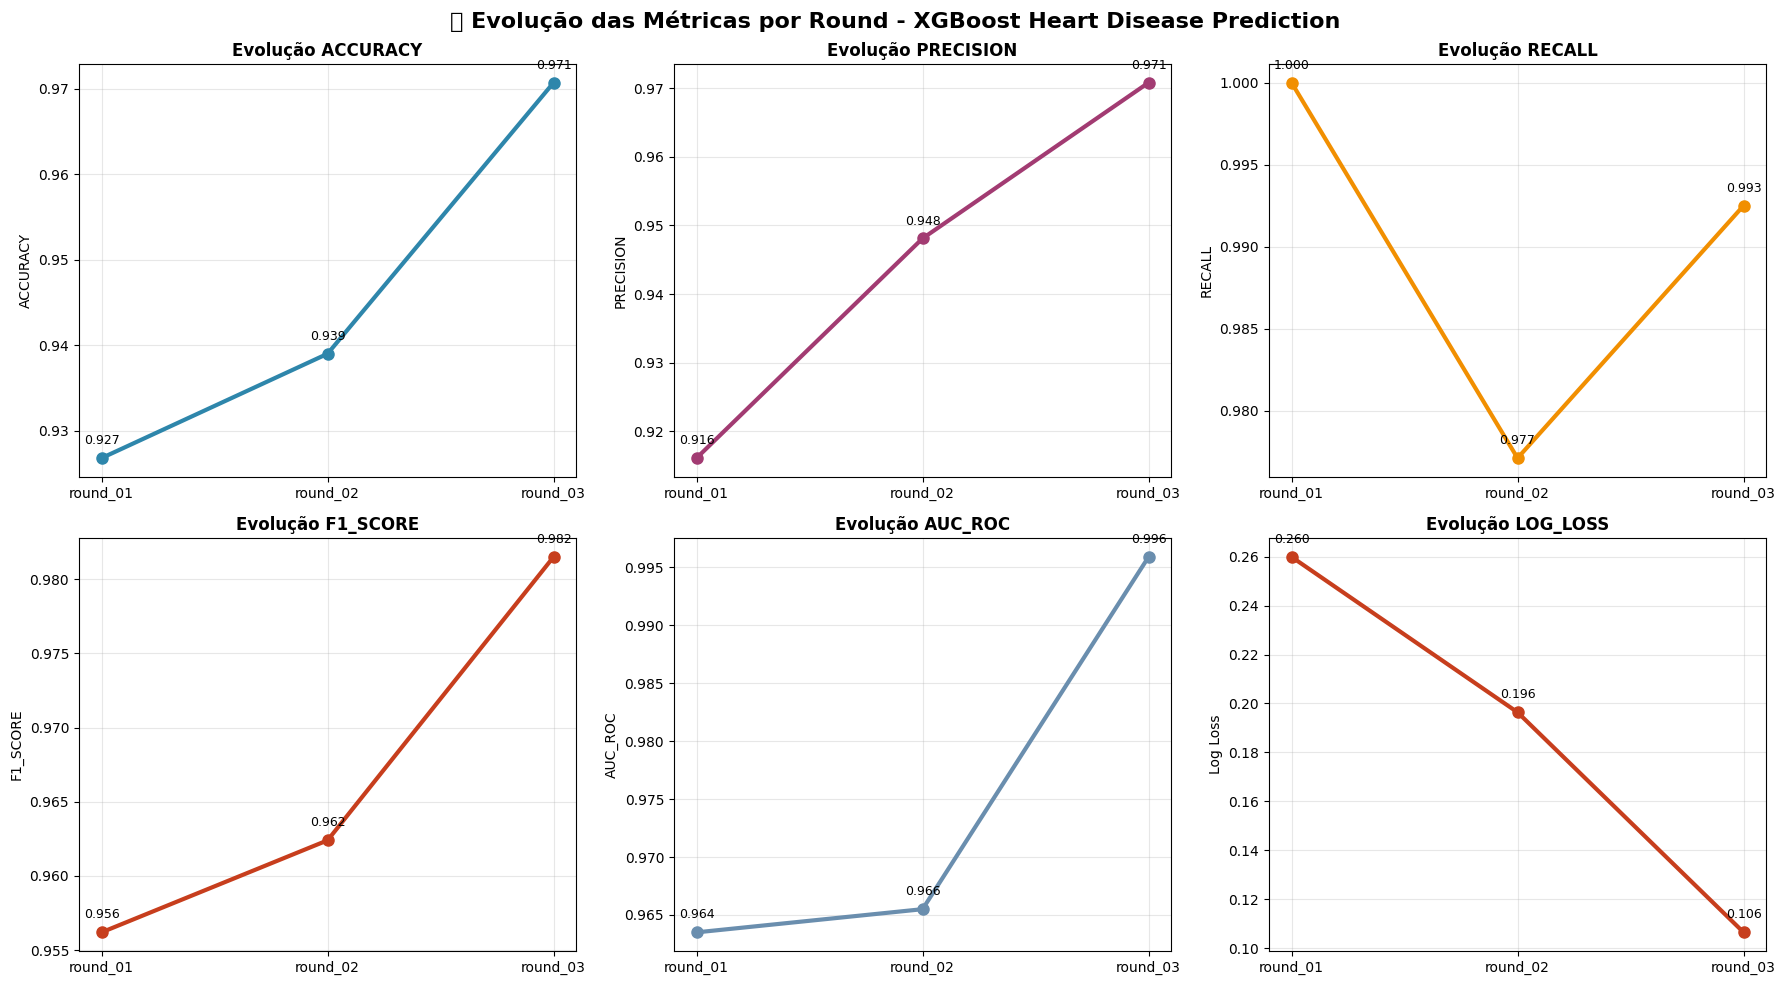


🔥 ANÁLISE DE MELHORIAS ENTRE ROUNDS
--------------------------------------------------

🔄 round_01 → round_02:
   📈 Accuracy: 0.9268 → 0.9390 (+1.22%)
   🎯 F1-Score: 0.9562 → 0.9624 (+0.62%)
   📉 LogLoss:  0.2599 → 0.1964 (+6.35% redução)

🔄 round_02 → round_03:
   📈 Accuracy: 0.9390 → 0.9707 (+3.17%)
   🎯 F1-Score: 0.9624 → 0.9815 (+1.91%)
   📉 LogLoss:  0.1964 → 0.1065 (+8.99% redução)


🎛️  ANÁLISE DOS AJUSTES E SEUS IMPACTOS
--------------------------------------------------

🎯 round_01 (21:32):
   📝 Ajustes: Baseline inicial com SMOTENC balanceado
   📊 Resultado: Accuracy=0.9268, F1=0.9562

🎯 round_02 (21:34):
   📝 Ajustes: nova rodada ajustando parametros scale_pos_weight = 1.8, max_depth = 5, threshold = 0.55
   📊 Resultado: Accuracy=0.9390, F1=0.9624

🎯 round_03 (21:35):
   📝 Ajustes: aumento na quantidade de registros do treino+oversampling direcionado em FP e FN
   📊 Resultado: Accuracy=0.9707, F1=0.9815




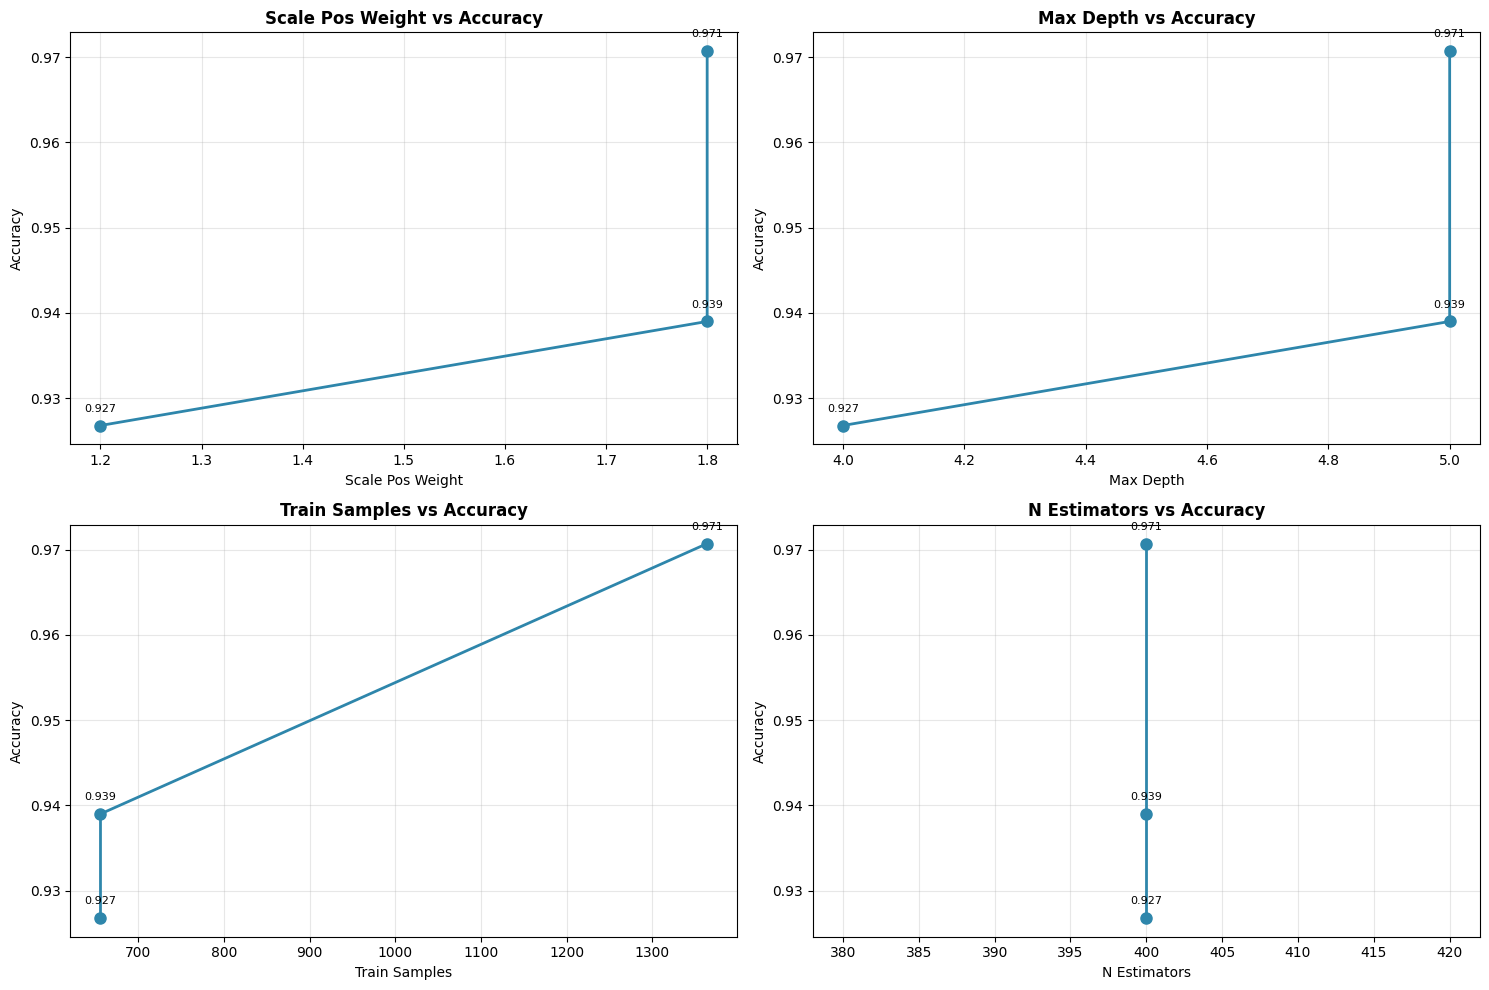

🎉 RESUMO FINAL DA EVOLUÇÃO
--------------------------------------------------
🏆 MELHOR ROUND: round_03
📈 Melhoria total em Accuracy: +4.74%
🎯 Melhoria total em F1-Score: +2.65%
📉 Redução total em LogLoss: +59.02%

🔍 FATORES CRÍTICOS DE SUCESSO:
   • Aumento de dados de treino: 656 → 1364 samples
   • Ajuste de scale_pos_weight: 1.2 → 1.8
   • Otimização de max_depth: 4 → 5

📊 PERFORMANCE FINAL:
   ✅ Accuracy: 0.9707 (97.07%)
   ✅ Precision: 0.9708
   ✅ Recall: 0.9925
   ✅ F1-Score: 0.9815
   ✅ AUC-ROC: 0.9959
   ✅ LogLoss: 0.1065



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Configuração do estilo
plt.style.use('default')
sns.set_palette("husl")

# Carregar os dados
results_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/results.txt"
df = pd.read_csv(results_path, sep='\t')

# Converter timestamp para datetime
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y%m%d_%H%M%S')

print("=" * 80)
print("🎯 ANÁLISE COMPARATIVA - ROUNDS DE TREINAMENTO XGBOOST")
print("=" * 80)

# Análise básica
print(f"📊 Total de rounds analisados: {len(df)}")
print(f"🕒 Período: {df['timestamp_dt'].min().strftime('%d/%m %H:%M')} a {df['timestamp_dt'].max().strftime('%d/%m %H:%M')}")
print("\n")

# 1. ANÁLISE DE EVOLUÇÃO DAS MÉTRICAS PRINCIPAIS
print("📈 EVOLUÇÃO DAS MÉTRICAS PRINCIPAIS")
print("-" * 50)

# Calcular evolução percentual
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc', 'log_loss']
for metric in metrics:
    if metric != 'log_loss':  # Para métricas onde maior é melhor
        improvement = ((df[metric].iloc[-1] - df[metric].iloc[0]) / df[metric].iloc[0]) * 100
        print(f"✅ {metric.upper():<12}: {df[metric].iloc[0]:.4f} → {df[metric].iloc[-1]:.4f} ({improvement:+.2f}%)")
    else:  # Para log_loss onde menor é melhor
        improvement = ((df[metric].iloc[0] - df[metric].iloc[-1]) / df[metric].iloc[0]) * 100
        print(f"✅ {metric.upper():<12}: {df[metric].iloc[0]:.4f} → {df[metric].iloc[-1]:.4f} ({improvement:+.2f}% de redução)")

print("\n")

# 2. GRÁFICOS DE EVOLUÇÃO
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 Evolução das Métricas por Round - XGBoost Heart Disease Prediction', fontsize=16, fontweight='bold')

# Métricas principais (maior é melhor)
main_metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE']

for i, metric in enumerate(main_metrics):
    ax = axes[i//3, i%3]
    ax.plot(df['round'], df[metric], marker='o', linewidth=3, markersize=8, color=colors[i], label=metric.upper())
    ax.set_title(f'Evolução {metric.upper()}', fontweight='bold')
    ax.set_ylabel(metric.upper())
    ax.grid(True, alpha=0.3)

    # Adicionar valores nos pontos
    for j, (round_name, value) in enumerate(zip(df['round'], df[metric])):
        ax.annotate(f'{value:.3f}', (j, value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Log Loss (menor é melhor)
ax = axes[1, 2]
ax.plot(df['round'], df['log_loss'], marker='o', linewidth=3, markersize=8, color='#C73E1D', label='LOG_LOSS')
ax.set_title('Evolução LOG_LOSS', fontweight='bold')
ax.set_ylabel('Log Loss')
ax.grid(True, alpha=0.3)

# Adicionar valores nos pontos
for j, (round_name, value) in enumerate(zip(df['round'], df['log_loss'])):
    ax.annotate(f'{value:.3f}', (j, value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 3. ANÁLISE DE MELHORIAS ENTRE ROUNDS
print("\n🔥 ANÁLISE DE MELHORIAS ENTRE ROUNDS")
print("-" * 50)

for i in range(1, len(df)):
    prev_round = df.iloc[i-1]
    curr_round = df.iloc[i]

    acc_improvement = (curr_round['accuracy'] - prev_round['accuracy']) * 100
    f1_improvement = (curr_round['f1_score'] - prev_round['f1_score']) * 100
    logloss_improvement = (prev_round['log_loss'] - curr_round['log_loss']) * 100

    print(f"\n🔄 {prev_round['round']} → {curr_round['round']}:")
    print(f"   📈 Accuracy: {prev_round['accuracy']:.4f} → {curr_round['accuracy']:.4f} ({acc_improvement:+.2f}%)")
    print(f"   🎯 F1-Score: {prev_round['f1_score']:.4f} → {curr_round['f1_score']:.4f} ({f1_improvement:+.2f}%)")
    print(f"   📉 LogLoss:  {prev_round['log_loss']:.4f} → {curr_round['log_loss']:.4f} ({logloss_improvement:+.2f}% redução)")

print("\n")

# 4. ANÁLISE DOS AJUSTES E IMPACTOS
print("🎛️  ANÁLISE DOS AJUSTES E SEUS IMPACTOS")
print("-" * 50)

for _, row in df.iterrows():
    print(f"\n🎯 {row['round']} ({row['timestamp_dt'].strftime('%H:%M')}):")
    print(f"   📝 Ajustes: {row['adjustments']}")
    print(f"   📊 Resultado: Accuracy={row['accuracy']:.4f}, F1={row['f1_score']:.4f}")

print("\n")

# 5. GRÁFICO DE CORRELAÇÃO ENTRE PARÂMETROS E PERFORMANCE
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Parâmetros vs Accuracy
params_to_plot = ['scale_pos_weight', 'max_depth', 'train_samples', 'n_estimators']
param_names = ['Scale Pos Weight', 'Max Depth', 'Train Samples', 'N Estimators']

for i, (param, name) in enumerate(zip(params_to_plot, param_names)):
    ax = axes[i//2, i%2]
    if param in df.columns:
        ax.plot(df[param], df['accuracy'], 'o-', linewidth=2, markersize=8, color='#2E86AB')
        ax.set_xlabel(name)
        ax.set_ylabel('Accuracy')
        ax.set_title(f'{name} vs Accuracy', fontweight='bold')
        ax.grid(True, alpha=0.3)

        # Adicionar valores
        for j, (x, y) in enumerate(zip(df[param], df['accuracy'])):
            ax.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# 6. RESUMO FINAL
print("🎉 RESUMO FINAL DA EVOLUÇÃO")
print("-" * 50)

best_round = df.loc[df['accuracy'].idxmax()]
initial_round = df.iloc[0]

print(f"🏆 MELHOR ROUND: {best_round['round']}")
print(f"📈 Melhoria total em Accuracy: {((best_round['accuracy'] - initial_round['accuracy']) / initial_round['accuracy'] * 100):+.2f}%")
print(f"🎯 Melhoria total em F1-Score: {((best_round['f1_score'] - initial_round['f1_score']) / initial_round['f1_score'] * 100):+.2f}%")
print(f"📉 Redução total em LogLoss: {((initial_round['log_loss'] - best_round['log_loss']) / initial_round['log_loss'] * 100):+.2f}%")

print(f"\n🔍 FATORES CRÍTICOS DE SUCESSO:")
print(f"   • Aumento de dados de treino: {initial_round['train_samples']} → {best_round['train_samples']} samples")
print(f"   • Ajuste de scale_pos_weight: {initial_round['scale_pos_weight']} → {best_round['scale_pos_weight']}")
print(f"   • Otimização de max_depth: {initial_round['max_depth']} → {best_round['max_depth']}")

print(f"\n📊 PERFORMANCE FINAL:")
print(f"   ✅ Accuracy: {best_round['accuracy']:.4f} ({best_round['accuracy']*100:.2f}%)")
print(f"   ✅ Precision: {best_round['precision']:.4f}")
print(f"   ✅ Recall: {best_round['recall']:.4f}")
print(f"   ✅ F1-Score: {best_round['f1_score']:.4f}")
print(f"   ✅ AUC-ROC: {best_round['auc_roc']:.4f}")
print(f"   ✅ LogLoss: {best_round['log_loss']:.4f}")

print("\n" + "=" * 80)

🔧 Lendo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/results.txt
💾 Tabela comparativa salva: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/COMP_table_20251026_201442.csv


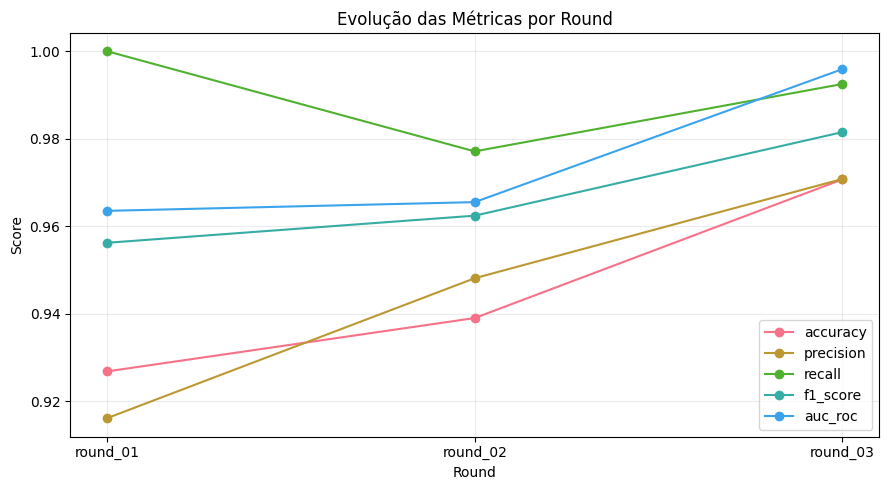

🖼️ Gráfico de métricas salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/COMP_metrics_20251026_201442.png


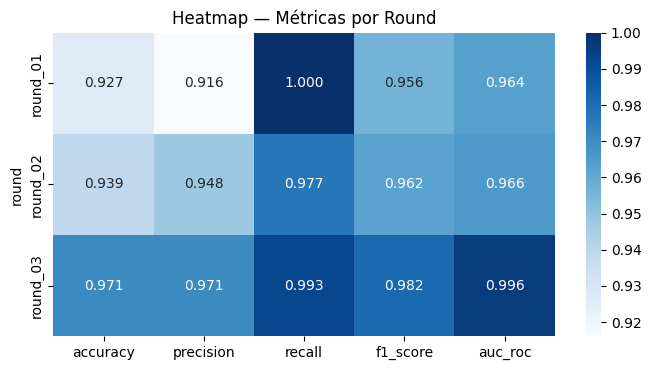

🖼️ Heatmap salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/COMP_heatmap_20251026_201442.png
📝 Deltas salvos: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/COMP_deltas_20251026_201442.txt
💾 SHAP top-10 comparativo salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/COMP_shap_top10_20251026_201442.csv


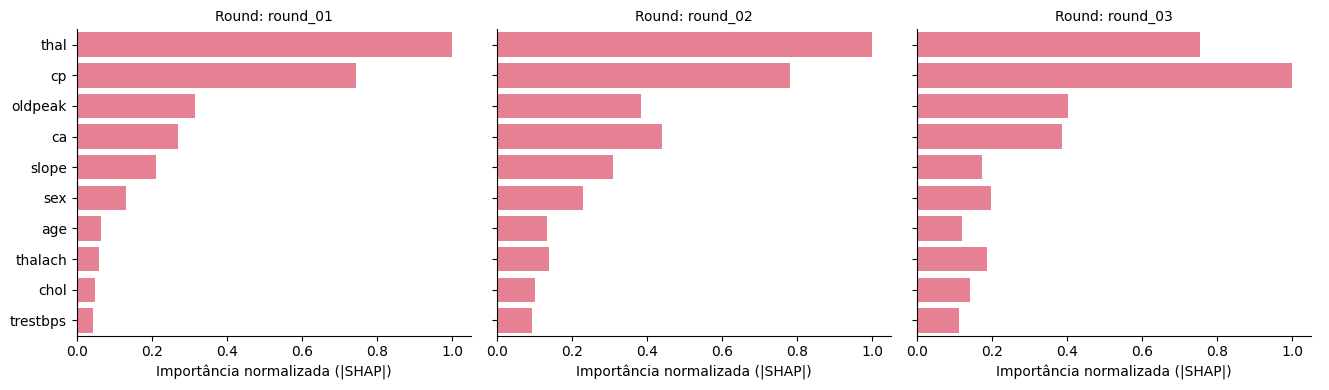

🖼️ Gráfico SHAP comparativo salvo: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/COMP_shap_top10_20251026_201442.png

✅ Comparativo de rounds concluído.
📂 Saídas em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results


In [10]:
# =========================================================
# 📊 COMPARATIVE MODEL ANALYSIS — R1 vs R2 vs R3 (governança)
# =========================================================
# Saídas em /results:
#   COMP_table_<ts>.csv
#   COMP_metrics_<ts>.png
#   COMP_heatmap_<ts>.png
#   COMP_deltas_<ts>.txt
#   (opcional) COMP_shap_top10_<ts>.csv
#   (opcional) COMP_shap_top10_<ts>.png
# =========================================================

import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1) CONFIG
drive_path  = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
results_txt = os.path.join(drive_path, "results", "results.txt")
rounds_dir  = os.path.join(drive_path, "models", "xgboost", "rounds")
out_dir     = os.path.join(drive_path, "results")
os.makedirs(out_dir, exist_ok=True)

ts = datetime.now().strftime("%Y%m%d_%H%M%S")
print(f"🔧 Lendo: {results_txt}")

# 2) CARREGAR E PREPARAR
df = pd.read_csv(results_txt, sep="\t")
# colunas essenciais (ajuste se seu results.txt tiver mais/menos campos)
base_cols = ["timestamp","prefix","round","model",
             "accuracy","precision","recall","f1_score","auc_roc","log_loss",
             "train_accuracy","train_samples","test_samples",
             "best_iteration"]
present = [c for c in base_cols if c in df.columns]
df = df[present].copy()

# ordena por tempo e round (para gráficos ficarem “em ordem”)
df = df.sort_values(["timestamp","round"]).reset_index(drop=True)

# 3) SALVAR TABELA COMPARATIVA
comp_csv = os.path.join(out_dir, f"COMP_table_{ts}.csv")
df.to_csv(comp_csv, index=False)
print(f"💾 Tabela comparativa salva: {comp_csv}")

# 4) GRÁFICO DE EVOLUÇÃO DAS MÉTRICAS
metrics = ["accuracy","precision","recall","f1_score","auc_roc"]
plt.figure(figsize=(9,5))
for m in metrics:
    plt.plot(df["round"], df[m], marker="o", label=m)
plt.title("Evolução das Métricas por Round")
plt.xlabel("Round"); plt.ylabel("Score"); plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()
metrics_png = os.path.join(out_dir, f"COMP_metrics_{ts}.png")
plt.savefig(metrics_png, dpi=300, bbox_inches="tight")
plt.show()
print(f"🖼️ Gráfico de métricas salvo: {metrics_png}")

# 5) HEATMAP DE PERFORMANCE
plt.figure(figsize=(7,3.8))
sns.heatmap(df.set_index("round")[metrics], annot=True, cmap="Blues", fmt=".3f")
plt.title("Heatmap — Métricas por Round")
plt.tight_layout()
heat_png = os.path.join(out_dir, f"COMP_heatmap_{ts}.png")
plt.savefig(heat_png, dpi=300, bbox_inches="tight")
plt.show()
print(f"🖼️ Heatmap salvo: {heat_png}")

# 6) TEXTO: DELTAS ENTRE ROUNDS (qual melhorou / piorou)
deltas_txt = os.path.join(out_dir, f"COMP_deltas_{ts}.txt")
with open(deltas_txt, "w") as f:
    f.write("=== COMPARATIVO ENTRE ROUNDS (DELTAS) ===\n")
    f.write(f"Fonte: {results_txt}\n\n")
    if len(df) >= 2:
        for i in range(1, len(df)):
            prev = df.iloc[i-1]; cur = df.iloc[i]
            f.write(f"> {prev['round']}  →  {cur['round']}\n")
            for m in metrics + ["log_loss"]:
                s = cur[m] - prev[m] if m != "log_loss" else prev[m] - cur[m]  # log_loss: quanto diminuiu (+ é bom)
                arrow = "↑" if s > 0 else ("↓" if s < 0 else "→")
                label = f"{m} (Δ{'+' if s>=0 else ''}{s:.4f})"
                if m == "log_loss":
                    label += "  [positivo = melhor]"
                f.write(f"  {arrow} {label}\n")
            if "best_iteration" in df.columns:
                bi_prev = str(prev["best_iteration"])
                bi_cur  = str(cur["best_iteration"])
                f.write(f"  best_iteration: {bi_prev} → {bi_cur}\n")
            f.write("\n")
    else:
        f.write("Apenas um round disponível — sem deltas.\n")

print(f"📝 Deltas salvos: {deltas_txt}")

# 7) (OPCIONAL) COMPARATIVO DE SHAP GLOBAL (Top-10 por round)
#    Procura em cada pasta de round o arquivo mais recente *_shap_global_log_*.txt
def latest_shap_global(round_id: str):
    rdir = os.path.join(rounds_dir, round_id)
    if not os.path.isdir(rdir):
        return None
    hits = sorted(glob.glob(os.path.join(rdir, "*_shap_global_log_*.txt")))
    return hits[-1] if hits else None

shap_frames = []
for rid in df["round"]:
    p = latest_shap_global(rid)
    if p:
        tmp = pd.read_csv(p, sep="\t")
        tmp["round"] = rid
        shap_frames.append(tmp)
    else:
        print(f"⚠️ SHAP global não encontrado para {rid} — pulando.")

if shap_frames:
    shap_df = pd.concat(shap_frames, ignore_index=True)
    # normaliza por round para comparação visual
    shap_df["norm"] = shap_df.groupby("round")["mean_abs_shap"].transform(
        lambda s: s / (s.max() if s.max() else 1.0)
    )
    # top-10 por round
    topk = shap_df.sort_values(["round","mean_abs_shap"], ascending=[True,False])\
                  .groupby("round").head(10)
    # salva CSV
    shap_csv = os.path.join(out_dir, f"COMP_shap_top10_{ts}.csv")
    topk.to_csv(shap_csv, index=False)
    print(f"💾 SHAP top-10 comparativo salvo: {shap_csv}")

    # gráfico: barras lado a lado por round
    # (ordena por importância dentro de cada round)
    g = sns.catplot(
        data=topk, kind="bar",
        x="norm", y="feature",
        col="round", col_wrap=min(3, topk["round"].nunique()),
        sharex=False, height=4, aspect=1.1
    )
    g.set_titles("Round: {col_name}")
    g.set_xlabels("Importância normalizada (|SHAP|)")
    g.set_ylabels("")
    plt.tight_layout()
    shap_png = os.path.join(out_dir, f"COMP_shap_top10_{ts}.png")
    plt.savefig(shap_png, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"🖼️ Gráfico SHAP comparativo salvo: {shap_png}")
else:
    print("ℹ️ Sem SHAP global disponível nos rounds — parte SHAP ignorada.")

print("\n✅ Comparativo de rounds concluído.")
print(f"📂 Saídas em: {out_dir}")


## Análise de Fairness

✅ Usando modelo existente do kernel.

🎯 Accuracy: 0.9707
get_disparity_predefined_group()

📈 Bias DataFrame (disparidades):
Colunas disponíveis no bias_df:
['model_id', 'score_threshold', 'k', 'attribute_name', 'attribute_value', 'tpr', 'tnr', 'for', 'fdr', 'fpr', 'fnr', 'npv', 'precision', 'pp', 'pn', 'ppr', 'pprev', 'fp', 'fn', 'tn', 'tp', 'group_label_pos', 'group_label_neg', 'group_size', 'total_entities', 'prev', 'ppr_disparity', 'pprev_disparity', 'precision_disparity', 'fdr_disparity', 'for_disparity', 'fpr_disparity', 'fnr_disparity', 'tpr_disparity', 'tnr_disparity', 'npv_disparity', 'ppr_ref_group_value', 'pprev_ref_group_value', 'precision_ref_group_value', 'fdr_ref_group_value', 'for_ref_group_value', 'fpr_ref_group_value', 'fnr_ref_group_value', 'tpr_ref_group_value', 'tnr_ref_group_value', 'npv_ref_group_value']


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,...,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,sex,female,NaN,NaN,NaN,NaN,0.477314,NaN,1.0,NaN,...,male,male,male,male,male,male,male,male,male,male
1,sex,male,NaN,NaN,NaN,NaN,1.000000,NaN,1.0,NaN,...,male,male,male,male,male,male,male,male,male,male
2,age_group,40-55,NaN,NaN,NaN,NaN,1.000000,NaN,1.0,NaN,...,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55
3,age_group,55-70,NaN,NaN,NaN,NaN,1.359243,NaN,1.0,NaN,...,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55
4,age_group,70+,NaN,NaN,NaN,NaN,1.077632,NaN,1.0,NaN,...,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55
5,age_group,<40,NaN,NaN,NaN,NaN,0.684211,NaN,1.0,NaN,...,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55,40-55



📊 Plotando disparidades para 'sex'…


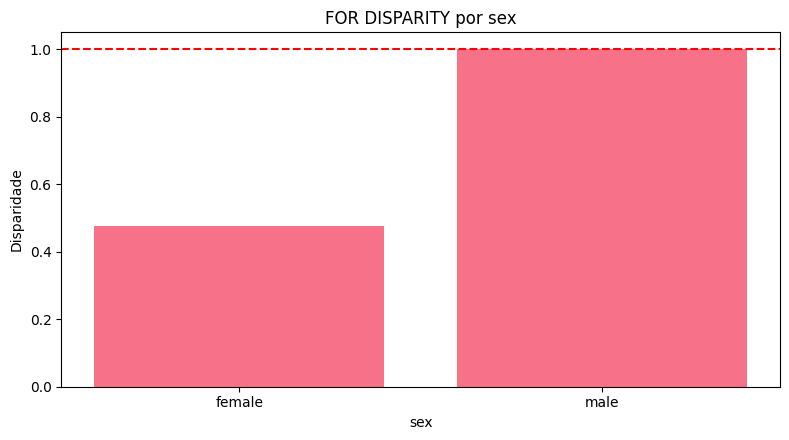


📊 Plotando disparidades para 'age_group'…


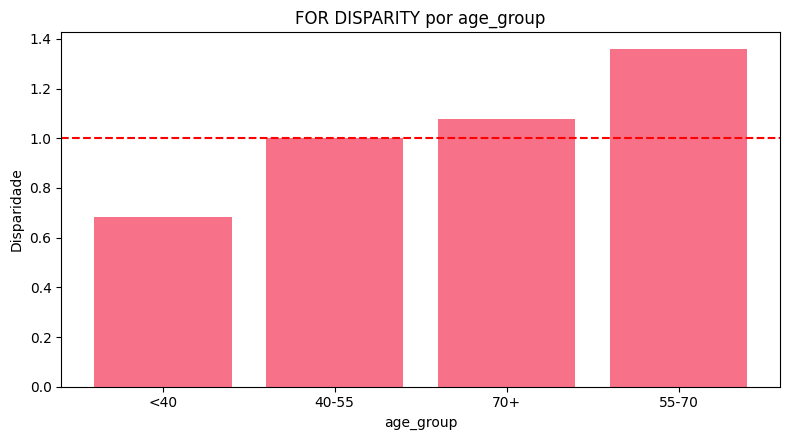

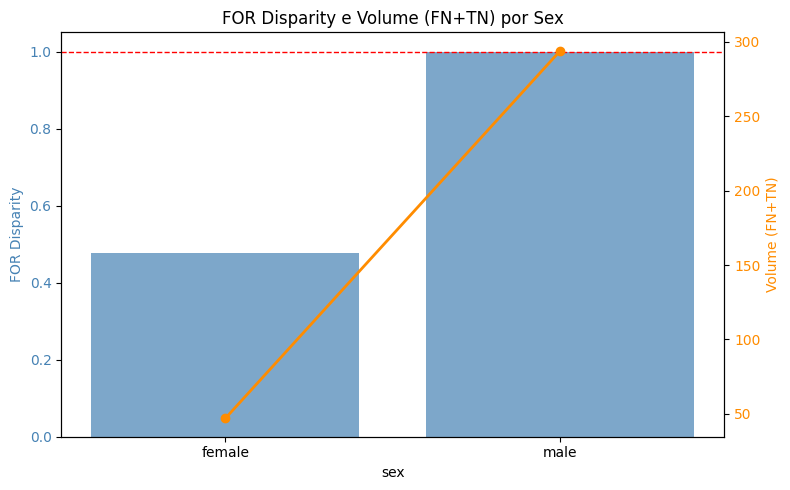

💾 Gráfico salvo: for_disparity_volume_sex_20251026_202741.png


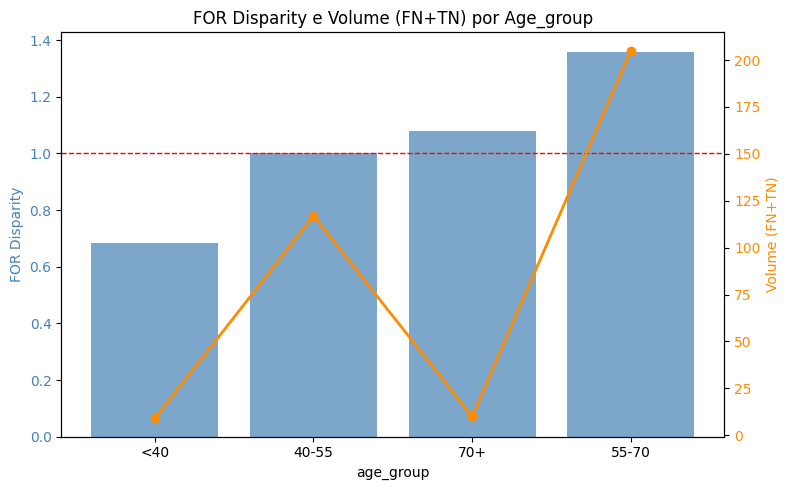

💾 Gráfico salvo: for_disparity_volume_age_group_20251026_202741.png

💾 Relatório HTML salvo em: /content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness/results/fairness_report_20251026_202742.html
📊 Colunas disponíveis no bias_df: ['model_id', 'score_threshold', 'k', 'attribute_name', 'attribute_value', 'tpr', 'tnr', 'for', 'fdr', 'fpr', 'fnr', 'npv', 'precision', 'pp', 'pn', 'ppr', 'pprev', 'fp', 'fn', 'tn', 'tp', 'group_label_pos', 'group_label_neg', 'group_size', 'total_entities', 'prev', 'ppr_disparity', 'pprev_disparity', 'precision_disparity', 'fdr_disparity', 'for_disparity', 'fpr_disparity', 'fnr_disparity', 'tpr_disparity', 'tnr_disparity', 'npv_disparity', 'ppr_ref_group_value', 'pprev_ref_group_value', 'precision_ref_group_value', 'fdr_ref_group_value', 'for_ref_group_value', 'fpr_ref_group_value', 'fnr_ref_group_value', 'tpr_ref_group_value', 'tnr_ref_group_value', 'npv_ref_group_value']


In [15]:
# =========================================================
# ⚖️ AEQUITAS FAIRNESS AUDIT - Heart Disease Binary Model
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from aequitas.group import Group
from aequitas.fairness import Fairness # Keep import for completeness, but won't use get_group_value_fairness
from aequitas.bias import Bias
from aequitas.plotting import Plot
from datetime import datetime
#
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# ----------------------------------------
# 1️⃣ Caminhos e dados
# ----------------------------------------
drive_path = "/content/drive/MyDrive/AI-HealthCare/EHR/heart-disease-fairness"
data_path = f"{drive_path}/data/processed/heart_resampled_round_02.csv"
results_path = f"{drive_path}/results"
os.makedirs(results_path, exist_ok=True)

df = pd.read_csv(data_path)
df["label"] = (df["num"] > 0).astype(int)

# Criar atributos sensíveis (para fairness, não treino)
df["sex_label"] = df["sex"].map({0: "female", 1: "male"})
# Ensure age_group is categorical
df["age_group"] = pd.cut(df["age"], bins=[0, 40, 55, 70, 100],
                         labels=["<40", "40-55", "55-70", "70+"], right=False).astype(str) # Use right=False for inclusivity


# ----------------------------------------
# 2️⃣ Dados para treino
# ----------------------------------------
X = df.drop(columns=["num", "label", "sex_label", "age_group"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ----------------------------------------
# 3️⃣ Treinar modelo
# ----------------------------------------
# Check if model 'model' already exists in the kernel's global scope
# If it exists and is an XGBClassifier, skip training to save time
# You might want to add more checks here if needed
try:
    if 'model' in globals() and isinstance(model, XGBClassifier):
        print("✅ Usando modelo existente do kernel.")
    else:
        print("🏋️‍♂️ Treinando novo modelo...")
        model = XGBClassifier(
            objective="binary:logistic",
            # device="cuda", # Let XGBoost decide based on availability
            eval_metric="logloss",
            learning_rate=0.03,
            n_estimators=150,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        model.fit(X_train, y_train)
        print("✅ Modelo treinado com sucesso (sem atributos sensíveis).")
except Exception as e:
    print(f"❌ Erro ao treinar ou usar modelo existente: {e}")
    # If training fails, you might want to handle it or stop execution
    raise


y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

acc = round(accuracy_score(y_test, y_pred), 4)
print(f"\n🎯 Accuracy: {acc}")


# ----------------------------------------
# 4️⃣ Dataset para auditoria Aequitas
# ----------------------------------------
# Ensure indices match after split and adding sensitive attributes
audit_df = pd.DataFrame({
    "score": y_pred_proba,
    "label_value": y_test.values,
    "sex": df.loc[y_test.index, "sex_label"].values,
    "age_group": df.loc[y_test.index, "age_group"].values
})

# Ensure 'score' and 'label_value' are numeric and sensitive attributes are strings
audit_df['score'] = pd.to_numeric(audit_df['score'], errors='coerce')
audit_df['label_value'] = pd.to_numeric(audit_df['label_value'], errors='coerce')
audit_df['sex'] = audit_df['sex'].astype(str)
audit_df['age_group'] = audit_df['age_group'].astype(str)

# Drop rows with NaNs if coercion failed
audit_df.dropna(inplace=True)


# ----------------------------------------
# 5️⃣ Executar Aequitas
# ----------------------------------------
g = Group()
# Removed score_threshold_grouping as it's not supported in this Aequitas version
xtab, _ = g.get_crosstabs(audit_df)


b = Bias()
# Added original_df parameter as required in Aequitas 0.42.0+
bias_df = b.get_disparity_predefined_groups(
    xtab,
    original_df=audit_df, # Pass the audit_df here
    ref_groups_dict={'sex': 'male', 'age_group': '40-55'},
    alpha=0.05
)

# ----------------------------------------
# 6️⃣ Exibir métricas (Focus on bias_df)
# ----------------------------------------
print("\n📈 Bias DataFrame (disparidades):")

# Check which columns exist in bias_df
available_bias_cols = bias_df.columns.tolist()
print("Colunas disponíveis no bias_df:")
print(available_bias_cols)

# Define core disparity columns to display
core_disparity_cols = [
    'ppr_disparity', 'pprev_disparity', 'precision_disparity', 'fdr_disparity',
    'for_disparity', 'fpr_disparity', 'fnr_disparity', 'tpr_disparity',
    'tnr_disparity', 'npv_disparity'
]

# Filter for existing core disparity columns
cols_bias_display = ["attribute_name", "attribute_value"] + [
    col for col in core_disparity_cols if col in available_bias_cols
]

# Add related reference group values if they exist
for metric in ['ppr', 'pprev', 'precision', 'fdr', 'for', 'fpr', 'fnr', 'tpr', 'tnr', 'npv']:
     if f'{metric}_ref_group_value' in available_bias_cols:
         cols_bias_display.append(f'{metric}_ref_group_value')

# Display bias_df using the filtered columns
display(bias_df[cols_bias_display].head(10))

## =========================================================
# 7️⃣ Gráficos de disparidade – versão estendida com FOR
# =========================================================
import matplotlib.pyplot as plt
import numpy as np

# Métricas de disparidade para visualização padrão
candidate_metrics = ["for_disparity", "fpr_disparity", "ppr_disparity"]

def plot_disparities(bias_df, attr, metrics, save_prefix=None):
    df_attr = bias_df[bias_df["attribute_name"] == attr].copy()
    if df_attr.empty:
        print(f"⚠️ Nada para plotar em '{attr}' (sem linhas no bias_df).")
        return

    metrics = [m for m in metrics if m in df_attr.columns]
    if not metrics:
        print(f"⚠️ Nenhuma métrica de disparidade disponível para '{attr}'.")
        return

    for m in metrics:
        plot_df = df_attr[["attribute_value", m]].dropna()
        if plot_df.empty:
            continue

        plot_df = plot_df.sort_values(m)
        plt.figure(figsize=(8, 4.5))
        plt.bar(plot_df["attribute_value"].astype(str), plot_df[m].astype(float))
        plt.axhline(1.0, linestyle="--", color="red")
        plt.title(f"{m.replace('_', ' ').upper()} por {attr}")
        plt.ylabel("Disparidade")
        plt.xlabel(attr)
        plt.tight_layout()
        if save_prefix:
            fname = f"{save_prefix}_{attr}_{m}_{timestamp}.png"
            plt.savefig(os.path.join(results_path, fname), dpi=120)
        plt.show()

# Rodar gráficos de FPR/PPR/FOR por atributo
for attr in ["sex", "age_group"]:
    print(f"\n📊 Plotando disparidades para '{attr}'…")
    plot_disparities(bias_df, attr, candidate_metrics, save_prefix="fairness_disparity")

## =========================================================
# 🩺 Gráfico adicional: FOR disparity + volume de FN e TN
# =========================================================
for attr in ["sex", "age_group"]:
    df_attr = bias_df[bias_df["attribute_name"] == attr].copy()
    if "for_disparity" not in df_attr.columns:
        continue

    # Combinar FOR disparity + volume de FN e TN
    df_plot = df_attr[["attribute_value", "for_disparity", "fn", "tn"]].copy()
    df_plot = df_plot.dropna().sort_values("for_disparity")

    if df_plot.empty:
        continue

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Barras = disparidade FOR
    ax1.bar(df_plot["attribute_value"], df_plot["for_disparity"], color="steelblue", alpha=0.7)
    ax1.axhline(1.0, color="red", linestyle="--", linewidth=1)
    ax1.set_ylabel("FOR Disparity", color="steelblue")
    ax1.set_xlabel(attr)
    ax1.tick_params(axis='y', labelcolor="steelblue")
    plt.xticks(rotation=0)

    # Linha = volume (FN + TN)
    ax2 = ax1.twinx()
    volumes = df_plot["fn"] + df_plot["tn"]
    ax2.plot(df_plot["attribute_value"], volumes, color="darkorange", marker="o", linewidth=2)
    ax2.set_ylabel("Volume (FN+TN)", color="darkorange")
    ax2.tick_params(axis='y', labelcolor="darkorange")

    plt.title(f"FOR Disparity e Volume (FN+TN) por {attr.capitalize()}")
    plt.tight_layout()

    # Salvar gráfico
    fname = f"for_disparity_volume_{attr}_{timestamp}.png"
    plt.savefig(os.path.join(results_path, fname), dpi=120)
    plt.show()

    print(f"💾 Gráfico salvo: {fname}")



# ----------------------------------------
# 8️⃣ Gerar Relatório HTML automático (Using bias_df)
# ----------------------------------------
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
report_path = f"{results_path}/fairness_report_{timestamp}.html"

with open(report_path, "w") as fhtml:
    fhtml.write(f"<html><head><title>Fairness Report - Heart Disease</title></head><body>")
    fhtml.write(f"<h1>🏥 Heart Disease Fairness Report</h1>")
    fhtml.write(f"<p><b>Model Accuracy:</b> {acc}</p>")
    fhtml.write(f"<p><b>Timestamp:</b> {timestamp}</p>")

    fhtml.write("<h2>Bias Disparities</h2>")

    # Prepare bias_df for HTML display - only include relevant columns
    bias_df_display = bias_df[cols_bias_display].head(15).to_html(index=False)
    fhtml.write(bias_df_display)


    fhtml.write("<h2>Interpretation</h2>")
    fhtml.write("""
    <p><b>How to read Disparity values:</b></p>
    <ul>
      <li>Values close to <b>1.0</b> indicate fairness parity between the group and the reference group.</li>
      <li><b>FNR Disparity</b>: If > 1.0, the model has a higher False Negative Rate (misses more positives) for this group compared to the reference group (possible underdiagnosis).</li>
      <li><b>FPR Disparity</b>: If > 1.0, the model has a higher False Positive Rate (incorrectly predicts positives) for this group compared to the reference group (possible overdiagnosis).</li>
      <li><b>TPR Disparity</b>: If < 1.0, the model has a lower True Positive Rate (detects fewer true positives) for this group compared to the reference group.</li>
      <li><b>PPR Disparity</b>: Predicted Positive Rate disparity. If > 1.0, the model predicts positives more often for this group compared to the reference group.</li>
      <li><b>Pprev Disparity</b>: Predicted Prevalence disparity. Similar to PPR, but relative to the group size.</li>
      <li><b>Reference Group Value</b>: The value of the metric for the reference group used in the disparity calculation (e.g., male for sex, 40-55 for age_group).</li>
    </ul>
    <p>Check Aequitas documentation for detailed interpretation of other metrics.</p>
    """)

    fhtml.write("<h2>Available Metrics in Bias DataFrame</h2>")
    fhtml.write(f"<p><b>Bias columns:</b> {', '.join(available_bias_cols)}</p>")


    fhtml.write("</body></html>")

print(f"\n💾 Relatório HTML salvo em: {report_path}")
print(f"📊 Colunas disponíveis no bias_df: {bias_df.columns.tolist()}")